# INSURANCE CLAIM FRAUD DETECTION

Loading the important modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
icf=pd.read_csv("insurance_claim_fraud_detection.csv")

In [3]:
icf

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [4]:
icf.shape

(1000, 40)

1000 rows and 40 columns in Incurance Claim Fraud Dataset.

In [5]:
icf.head().T

0                  1  \
months_as_customer                                328                228   
age                                                48                 42   
policy_number                                  521585             342868   
policy_bind_date                           17-10-2014         27-06-2006   
policy_state                                       OH                 IN   
policy_csl                                    250/500            250/500   
policy_deductable                                1000               2000   
policy_annual_premium                         1406.91            1197.22   
umbrella_limit                                      0            5000000   
insured_zip                                    466132             468176   
insured_sex                                      MALE               MALE   
insured_education_level                            MD                 MD   
insured_occupation                       craft-repair  machine-op-inspct   
insured_hobbies                              sleeping            reading   
insured_relationship                          husband     other-relative   
capital-gains                                   53300                  0   
capital-loss                                        0                  0   
incident_date                              25-01-2015         21-01-2015   
incident_type                Single Vehicle Collision      Vehicle Theft   
collision_type                         Side Collision                  ?   
incident_severity                        Major Damage       Minor Damage   
authorities_contacted                          Police             Police   
incident_state                                     SC                 VA   
incident_city                                Columbus          Riverwood   
incident_location                      9935 4th Drive       6608 MLK Hwy   
incident_hour_of_the_day                            5                  8   
number_of_vehicles_involved                         1                  1   
property_damage                                   YES                  ?   
bodily_injuries                                     1                  0   
witnesses                                           2                  0   
police_report_available                           YES                  ?   
total_claim_amount                              71610               5070   
injury_claim                                     6510                780   
property_claim                                  13020                780   
vehicle_claim                                   52080               3510   
auto_make                                        Saab           Mercedes   
auto_model                                        92x               E400   
auto_year                                        2004               2007   
fraud_reported                                      Y                  Y   
_c39                                              NaN                NaN   

                                                   2  \
months_as_customer                               134   
age                                               29   
policy_number                                 687698   
policy_bind_date                          06-09-2000   
policy_state                                      OH   
policy_csl                                   100/300   
policy_deductable                               2000   
policy_annual_premium                        1413.14   
umbrella_limit                               5000000   
insured_zip                                   430632   
insured_sex                                   FEMALE   
insured_education_level                          PhD   
insured_occupation                             sales   
insured_hobbies                          board-games   
insured_relationship                       own-child   
capital-gains                          

First 5 rows with all columns.

In [6]:
icf.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Observation;

Three types of data int,object and float.

In [7]:
icf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Observation;

2 ( float ), 17 (int) and 21 (object) in Dataset, 1000 null values in (_c39) column.

# Checking Null Values

In [8]:
icf.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Observation;

1000 null values in (_c39), We can not fill all values So we have to drop this column.

In [9]:
icf.drop("_c39",axis=1,inplace=True)

In [10]:
icf.keys()

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

Observation;

_c39 column has been dropped.

In [11]:
icf.isnull().sum().sum()

0

<AxesSubplot: >

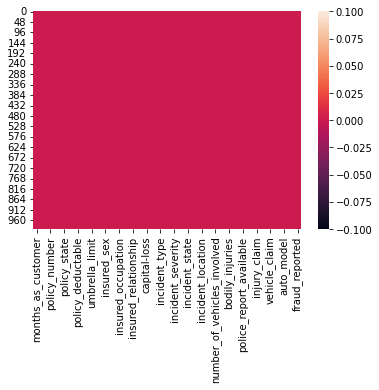

In [12]:
sns.heatmap(icf.isnull())

Observation;

No Blanks in Dataset it means no null values in Dataset.

# Statistical Summary

In [13]:
icf.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

Observation;

High variance in (capital-gains) and (vehicle_claim) column in mean and median,
Variance in most of the column in 75% and 100 %.

<AxesSubplot: >

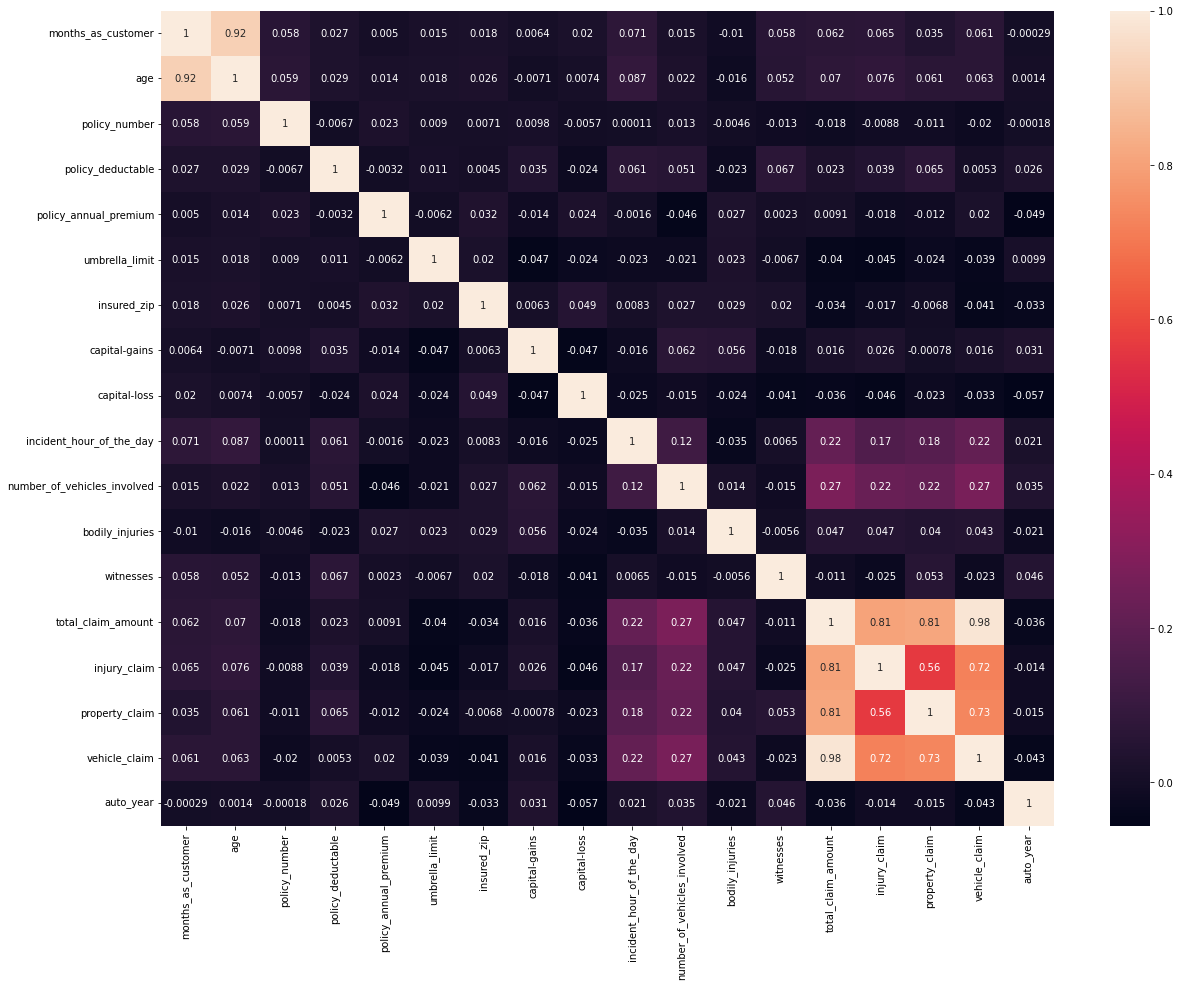

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(icf.corr(),annot=True)

In [15]:
icf.corr().sum().sort_values(ascending=False)

total_claim_amount             4.142260
vehicle_claim                  3.933313
property_claim                 3.667168
injury_claim                   3.561475
age                            2.485293
months_as_customer             2.428174
number_of_vehicles_involved    2.250533
incident_hour_of_the_day       2.053585
policy_deductable              1.387229
bodily_injuries                1.187409
witnesses                      1.147299
insured_zip                    1.115022
capital-gains                  1.114514
policy_number                  1.091490
policy_annual_premium          1.007027
auto_year                      0.904109
umbrella_limit                 0.828803
capital-loss                   0.700362
dtype: float64

Observation;

(auto_year), (umbrella_limit) and (capital-loss) are very less correlated. And (total_claim_amount),(vehicle_claim),(property_claim),(injury_claim) are high correlated.

# DATA VISUALIZATION OR EDA

In [16]:
icf.keys()

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [17]:
icf["months_as_customer"].value_counts()

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64

<AxesSubplot: xlabel='months_as_customer', ylabel='Count'>

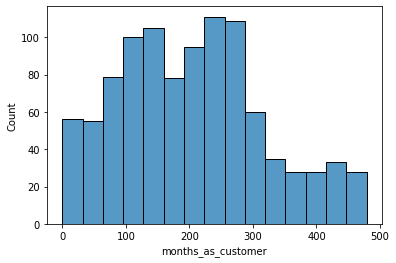

In [18]:
sns.histplot(icf["months_as_customer"])

Observation;

months_as_customer data is not normally distributed.

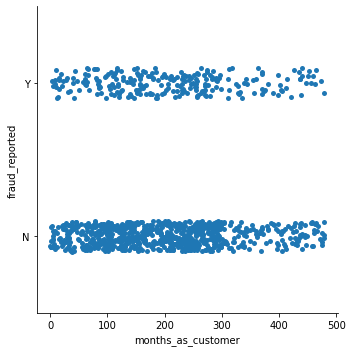

In [19]:
sns.catplot(x="months_as_customer",y="fraud_reported",data=icf)

Observation;

fraud_reported no is higher than yes in months_as_customer,it means Those who are as old as they have not done fraud.

In [20]:
icf["age"].value_counts()

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

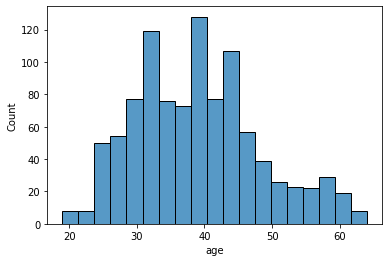

In [21]:
sns.histplot(icf["age"])

Observation;

age data is normally distributed.

<AxesSubplot: xlabel='age', ylabel='fraud_reported'>

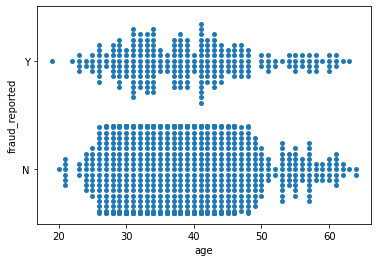

In [22]:
sns.swarmplot(x="age",y="fraud_reported",data=icf)

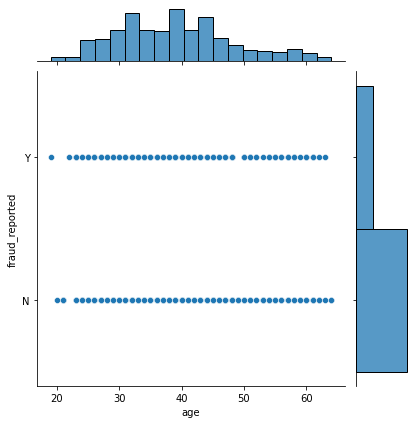

In [23]:
sns.jointplot(x="age",y="fraud_reported",data=icf)

Observation;

fraud_reported No is higher in age data.

In [24]:
icf["policy_number"].value_counts()

521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64

Observation;

Policy_number is number of policy,it is not very much correlated so we can drop this column.

In [25]:
icf.drop("policy_number",axis=1,inplace=True)

In [26]:
icf.keys()

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [27]:
icf.shape

(1000, 38)

Observation;

policy_number column has been dropped.

In [28]:
icf["policy_bind_date"].value_counts()

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

Observation;

Policy_bind_date is The date when the policy was made is,it is not very much correlated so we can drop this column.

In [29]:
icf.drop("policy_bind_date",axis=1,inplace=True)

In [30]:
icf.keys()

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [31]:
icf.shape

(1000, 37)

Observation;

policy_bind_date column has been dropped.

In [32]:
icf["policy_state"].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

<AxesSubplot: xlabel='policy_state', ylabel='count'>

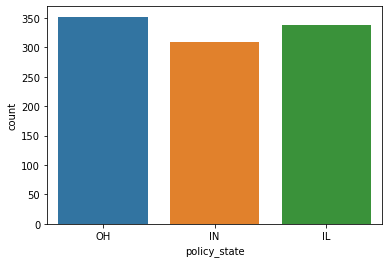

In [33]:
sns.countplot(x="policy_state",data=icf)

Observation;

All data are almost same.

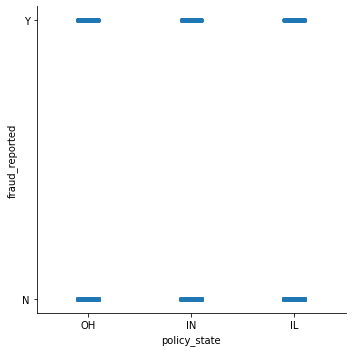

In [34]:
sns.catplot(x="policy_state",y="fraud_reported",data=icf)

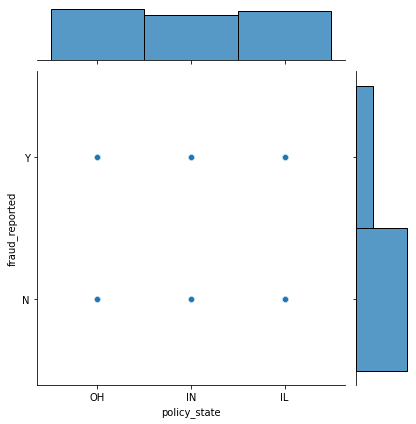

In [35]:
sns.jointplot(x="policy_state",y="fraud_reported",data=icf)

Observation:
    
No fraud_reported is higher in policy_state column.

In [36]:
icf["policy_csl"].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

<AxesSubplot: xlabel='policy_csl', ylabel='count'>

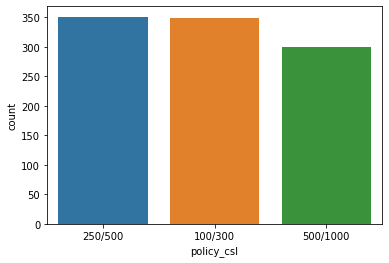

In [37]:
sns.countplot(x="policy_csl",data=icf)

Observation;

All datas are almost same.

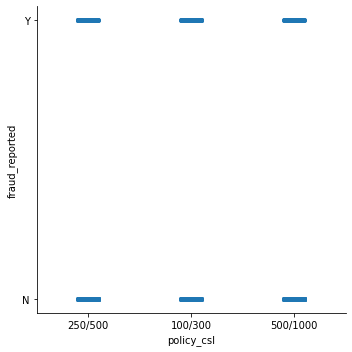

In [38]:
sns.catplot(x="policy_csl",y="fraud_reported",data=icf)

In [39]:
icf["policy_deductable"].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

<AxesSubplot: xlabel='policy_deductable'>

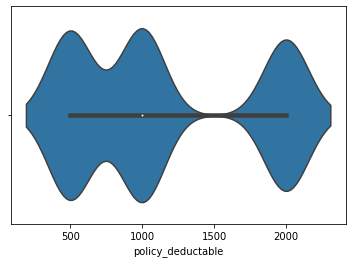

In [40]:
sns.violinplot(x="policy_deductable",data=icf)

Observation;

All type of policy_deductable is almost same.

<AxesSubplot: xlabel='policy_deductable', ylabel='fraud_reported'>

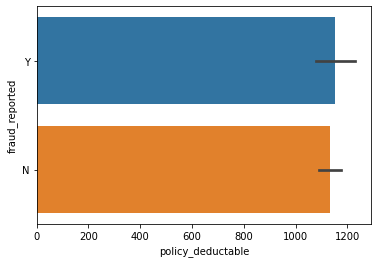

In [41]:
sns.barplot(x="policy_deductable",y="fraud_reported",data=icf)

Observation;

fraud_reported is same for policy_deductable column.

In [42]:
icf["policy_annual_premium"].value_counts()

1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64

<AxesSubplot: xlabel='policy_annual_premium', ylabel='Count'>

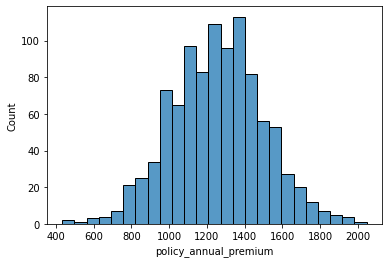

In [43]:
sns.histplot(icf["policy_annual_premium"])

Observation;

policy_annual_premium data is normal distributed.

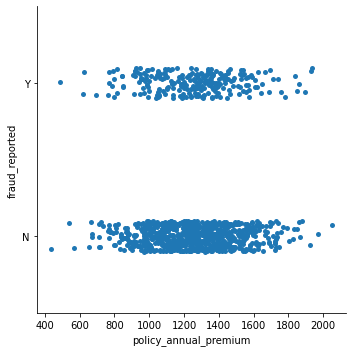

In [44]:
sns.catplot(x="policy_annual_premium",y="fraud_reported",data=icf)

Observation;

fraud_reported No is higher for policy_annual_premium.

In [45]:
icf["umbrella_limit"].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

<AxesSubplot: xlabel='umbrella_limit'>

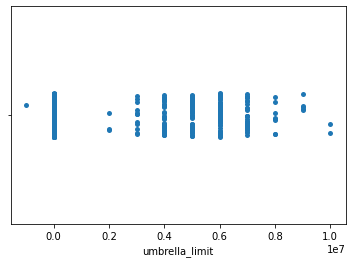

In [46]:
sns.stripplot(x="umbrella_limit",data=icf)

Observation;

0 type of data is the most for umbrella_limit.

<AxesSubplot: xlabel='umbrella_limit', ylabel='fraud_reported'>

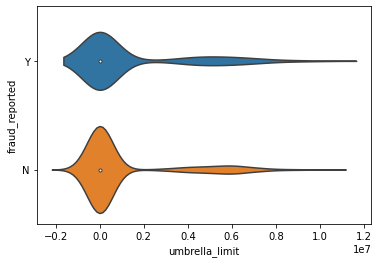

In [47]:
sns.violinplot(x="umbrella_limit",y="fraud_reported",data=icf)

Observation;

fraud_reported NO is higher for umbrella_limit.

In [48]:
icf["insured_zip"].value_counts()

477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: insured_zip, Length: 995, dtype: int64

<AxesSubplot: xlabel='insured_zip', ylabel='Count'>

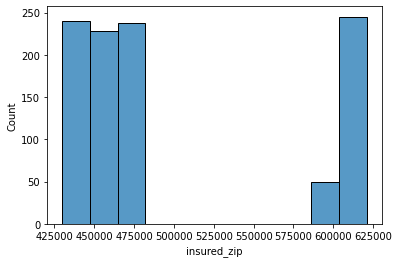

In [49]:
sns.histplot(icf["insured_zip"])

<AxesSubplot: xlabel='insured_zip'>

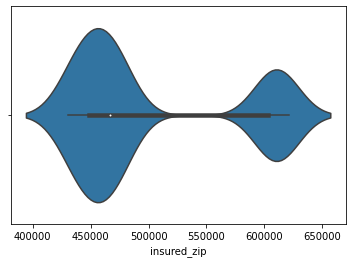

In [50]:
sns.violinplot(x="insured_zip",data=icf)

Observation;

insured_zip is higher in between 430000 to 470000.

<AxesSubplot: xlabel='insured_zip', ylabel='fraud_reported'>

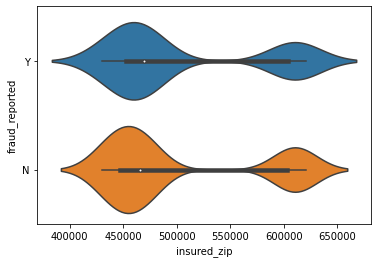

In [51]:
sns.violinplot(x="insured_zip",y="fraud_reported",data=icf)

Observation;

fraud_reported data is same for insured_zip.

In [52]:
icf["insured_sex"].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

<AxesSubplot: xlabel='insured_sex', ylabel='count'>

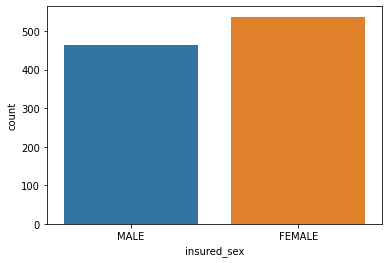

In [53]:
sns.countplot(x="insured_sex",data=icf)

Observation;

insured_sex Female is higher than Male.

In [54]:
icf["insured_education_level"].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

<AxesSubplot: xlabel='insured_education_level', ylabel='count'>

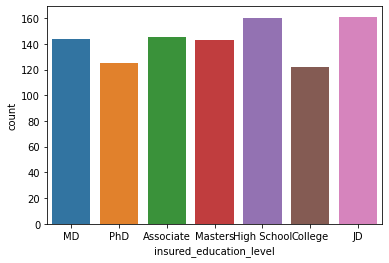

In [55]:
sns.countplot(x="insured_education_level",data=icf)

<AxesSubplot: xlabel='insured_education_level', ylabel='fraud_reported'>

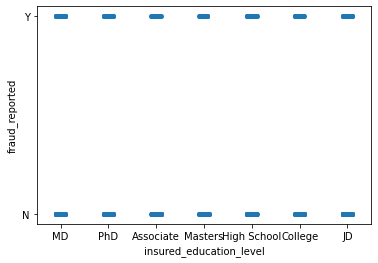

In [56]:
sns.stripplot(x="insured_education_level",y="fraud_reported",data=icf)

Observation;

insured_education_level datas are almost same.

In [57]:
icf["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<AxesSubplot: xlabel='insured_occupation', ylabel='count'>

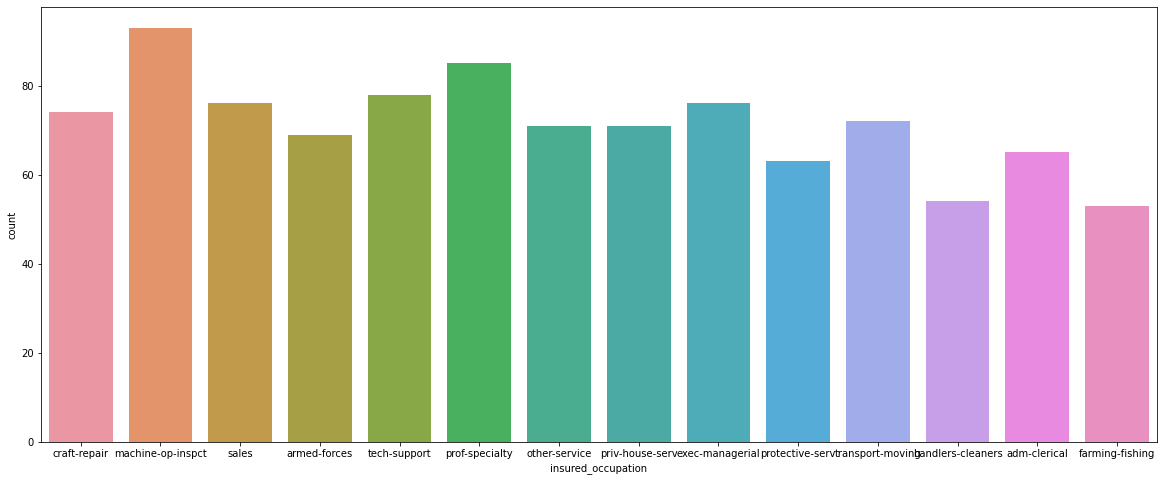

In [58]:
plt.figure(figsize=(20,8))
sns.countplot(x="insured_occupation",data=icf)

Observation;

No high variance in insured_occupation data.

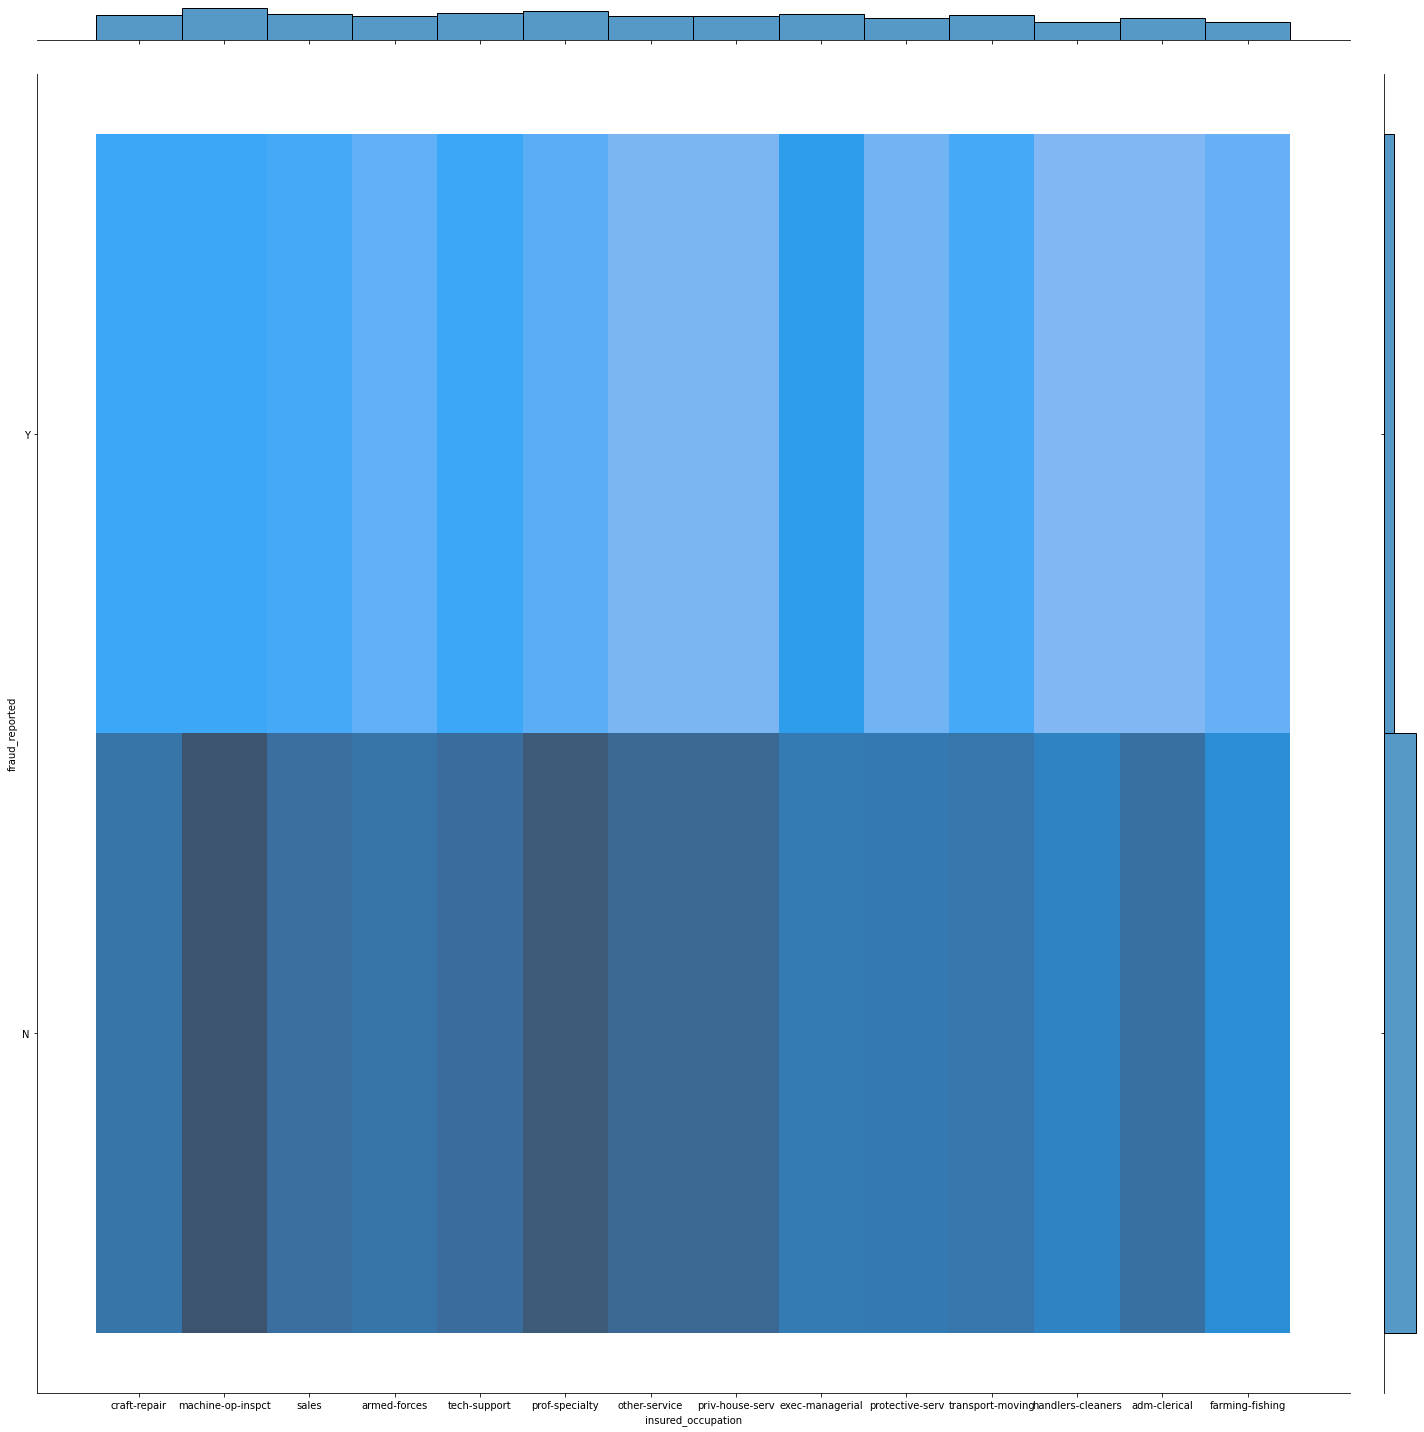

In [59]:

sns.jointplot(x="insured_occupation",y="fraud_reported",data=icf,kind="hist",height=20,space=1,ratio=20)

Observation;

No fraud_reported is higher for insured_occupation.

In [60]:
icf["insured_hobbies"].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

<AxesSubplot: xlabel='insured_hobbies', ylabel='count'>

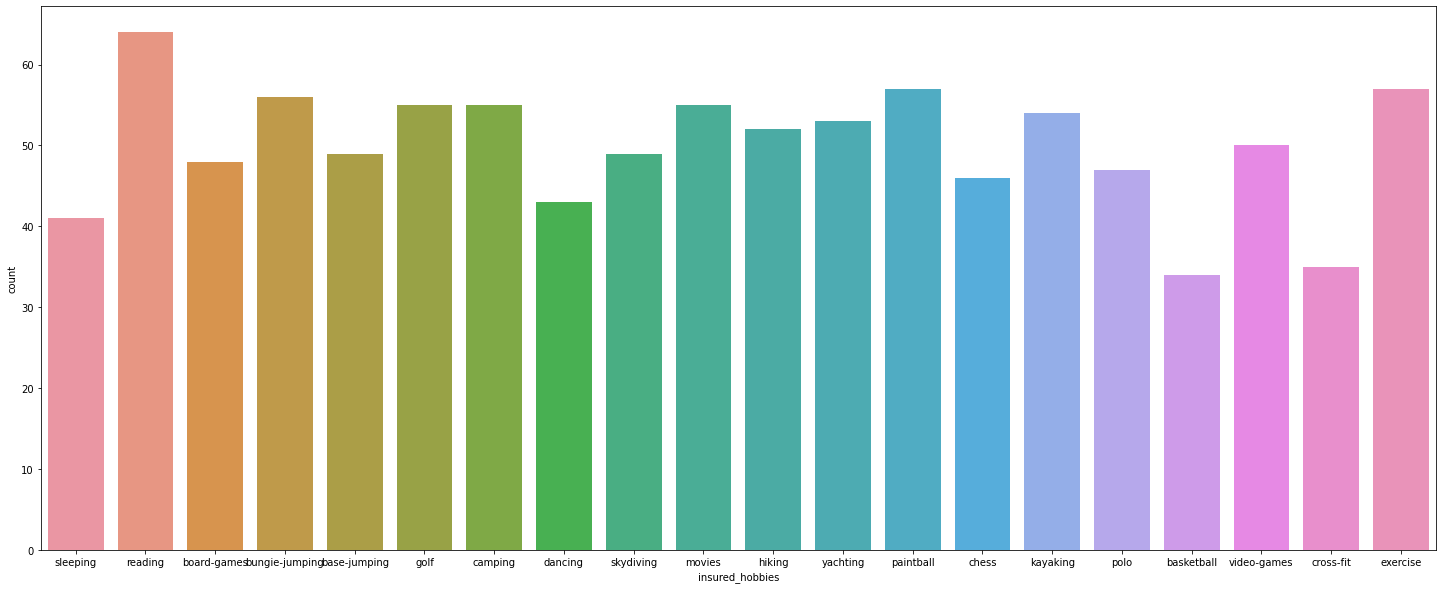

In [61]:
plt.figure(figsize=(25,10))
sns.countplot(x="insured_hobbies",data=icf)

Observation;

All data are almost same.

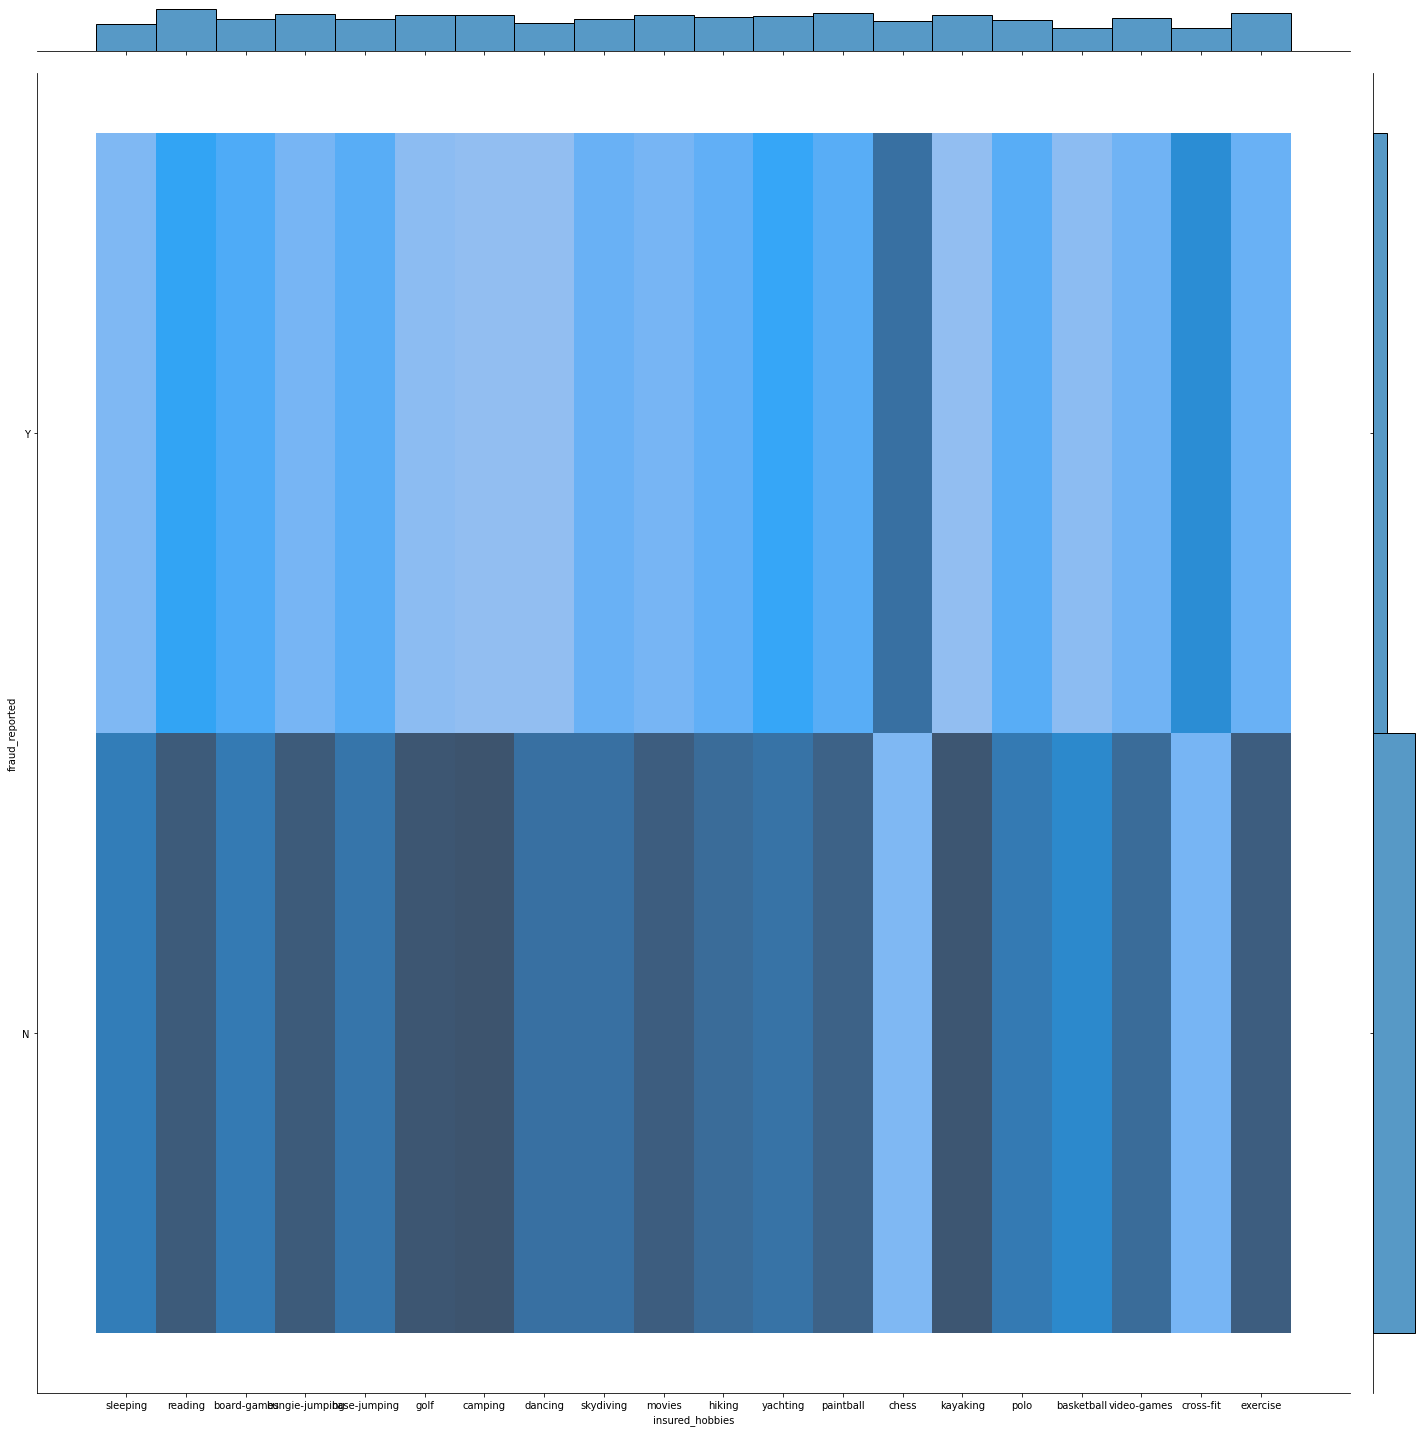

In [62]:
sns.jointplot(x="insured_hobbies",y="fraud_reported",data=icf,kind="hist",height=20,space=0.5,ratio=20)

Observation;

People who have a hobby to play chess and cross-fit have more fraud report in Yes.

In [63]:
icf["insured_relationship"].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

<AxesSubplot: xlabel='insured_relationship', ylabel='count'>

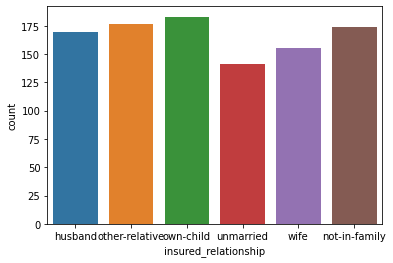

In [64]:
sns.countplot(x="insured_relationship",data=icf)

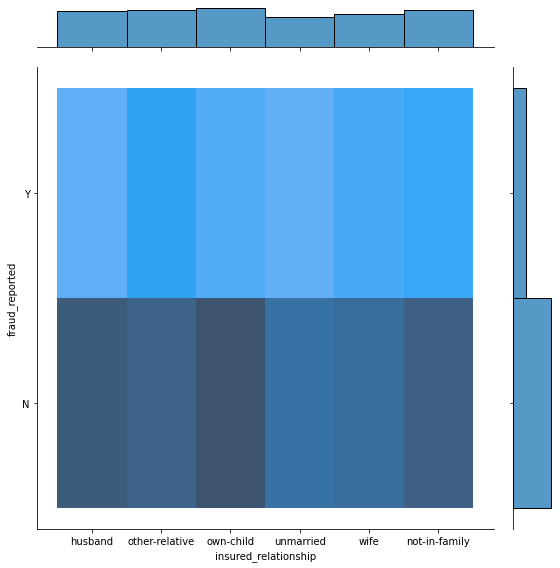

In [65]:
sns.jointplot(x="insured_relationship",y="fraud_reported",data=icf,kind="hist",height=8,space=0.5,ratio=8)

Observation;

NO fraud_reported is higher for insured_relationship.

In [66]:
icf["capital-gains"].value_counts()

0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64

<AxesSubplot: xlabel='capital-gains', ylabel='Count'>

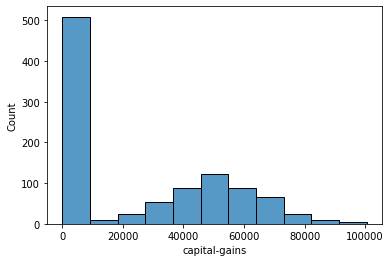

In [67]:
sns.histplot(icf["capital-gains"])

capital-gains 0 is the most.

<AxesSubplot: xlabel='capital-gains', ylabel='fraud_reported'>

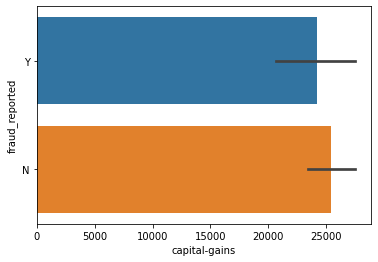

In [68]:
sns.barplot(x="capital-gains",y="fraud_reported",data=icf)

Observation;

NO fraud_report is higher for capital-gains.

In [69]:
icf["capital-loss"].value_counts()

 0        475
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64

<AxesSubplot: xlabel='capital-loss', ylabel='Count'>

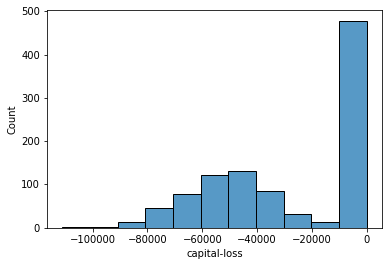

In [70]:
sns.histplot(icf["capital-loss"])

Observation;

capital-loss 0 is the most.

<AxesSubplot: xlabel='capital-loss', ylabel='fraud_reported'>

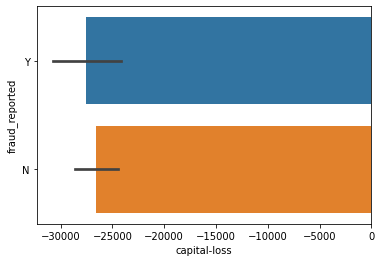

In [71]:
sns.barplot(x="capital-loss",y="fraud_reported",data=icf)

Observation;

Yes fraud_reported is higher for capital-loss.

In [72]:
icf["incident_date"].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

Incident_date doesn't affect fraud so much, So we can drop this column.

In [73]:
icf.drop("incident_date",axis=1,inplace=True)

In [74]:
icf.shape

(1000, 36)

Observation;

incident_date column has been dropped.

In [75]:
icf["incident_type"].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

<AxesSubplot: xlabel='incident_type', ylabel='count'>

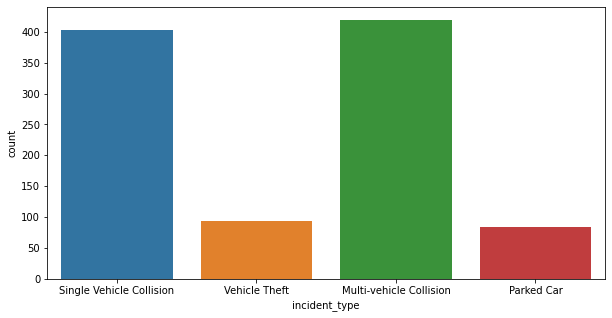

In [76]:
plt.figure(figsize=(10,5))
sns.countplot(x="incident_type",data=icf)

Observation;

Multi-vehicle Collision and Single Vehicle Collision incident_type is higher.

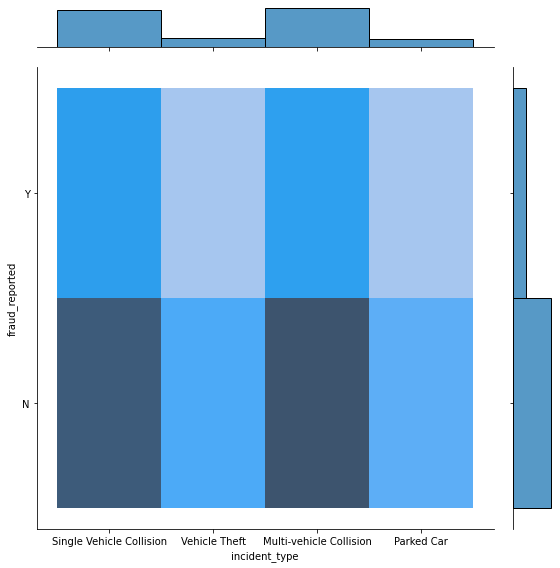

In [77]:
sns.jointplot(x="incident_type",y="fraud_reported",data=icf,kind="hist",height=8,space=0.5,ratio=8)

fraud_reported y is higher in Single Vehicle Collision and Multi-vehicle Collision types of incident_type.

In [78]:
icf.keys()

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [79]:
icf["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

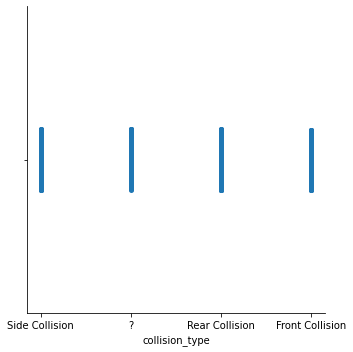

In [80]:
sns.catplot(x="collision_type",data=icf)

All data are almost same.

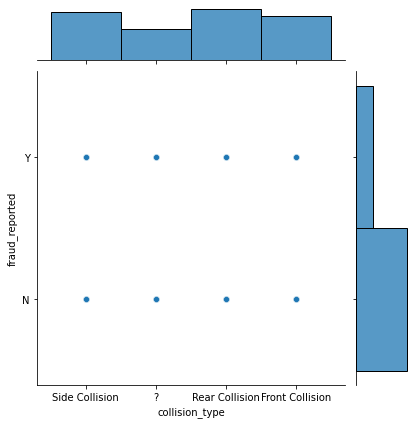

In [81]:
sns.jointplot(x="collision_type",y="fraud_reported",data=icf)

Observation;

NO fraud_reported is higher in collision_type.

In [82]:
icf["incident_severity"].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

<AxesSubplot: xlabel='incident_severity', ylabel='count'>

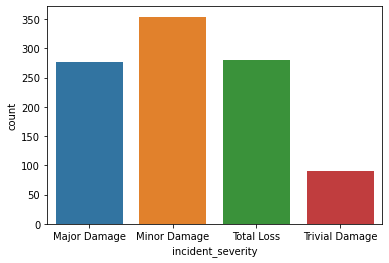

In [83]:
sns.countplot(x="incident_severity",data=icf)

Observation;

Minor Damage is highest for incident_severity and Trivial Damage is lowest for incident_severity.

<AxesSubplot: xlabel='incident_severity', ylabel='fraud_reported'>

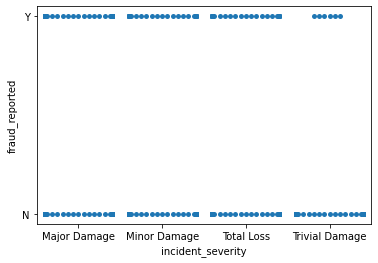

In [84]:
sns.swarmplot(x="incident_severity",y="fraud_reported",data=icf)

fraud_reported is No is higher for incident_severity. 

In [85]:
icf["authorities_contacted"].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

<AxesSubplot: xlabel='authorities_contacted', ylabel='count'>

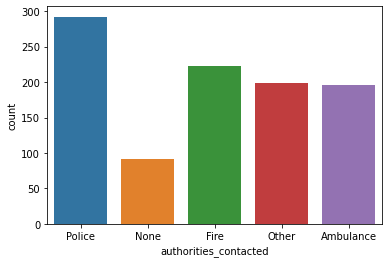

In [86]:
sns.countplot(x="authorities_contacted",data=icf)

<AxesSubplot: xlabel='authorities_contacted', ylabel='fraud_reported'>

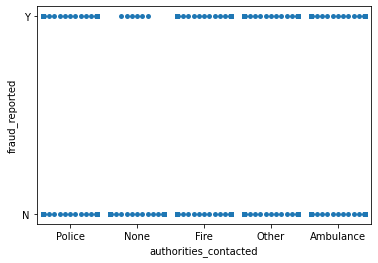

In [87]:
sns.swarmplot(x="authorities_contacted",y="fraud_reported",data=icf)

<AxesSubplot: xlabel='authorities_contacted', ylabel='fraud_reported'>

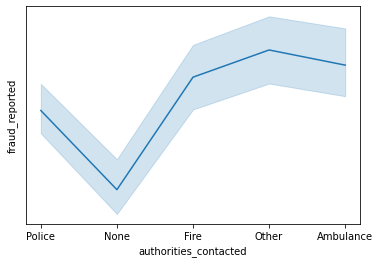

In [88]:
sns.lineplot(x="authorities_contacted",y="fraud_reported",data=icf)

observation;

fraud_reported No is higher of None type of authorities_contacted and fraud_reported yes is higher for Others type of authorities_contacted.

In [89]:
icf["incident_state"].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

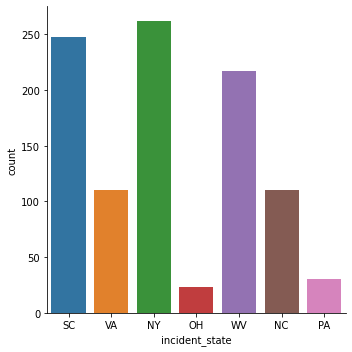

In [90]:
sns.catplot(x="incident_state",data=icf,kind="count")

Observation;

NY, SC and WV type of incident_state are higher and PA and OH type of incident_state is lower.

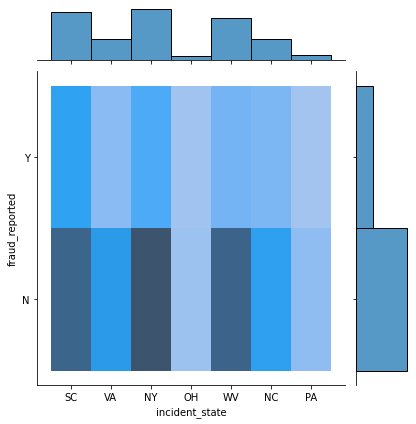

In [91]:
sns.jointplot(x="incident_state",y="fraud_reported",data=icf,kind="hist")

Observation;
fraud_repoerted NO is higher for incident_state.

In [92]:
icf["incident_city"].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

<AxesSubplot: ylabel='incident_city'>

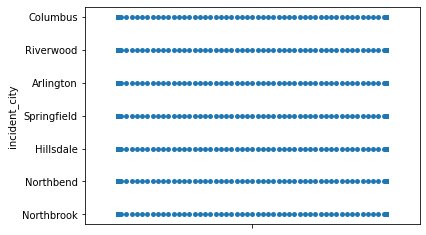

In [93]:
sns.swarmplot(y="incident_city",data=icf)

Observation;

All data are almost same in incident_city.

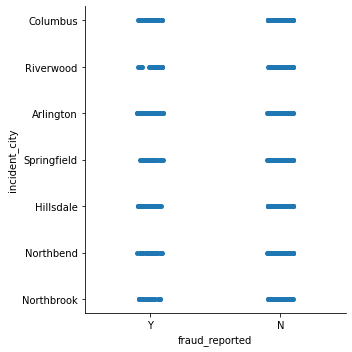

In [94]:
sns.catplot(y="incident_city",x="fraud_reported",data=icf)

Observation;

fraud_reported NO is higher for incident_city.

In [95]:
icf["incident_location"].value_counts()

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

incident_location is not so much important for fraud_reported so we can drop this column.

In [97]:
icf.drop("incident_location",axis=1,inplace=True)

In [98]:
icf.keys()

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [99]:
icf.shape

(1000, 35)

incident_location column has been dropped.

In [100]:
icf["incident_hour_of_the_day"].value_counts()

17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

<AxesSubplot: xlabel='incident_hour_of_the_day', ylabel='count'>

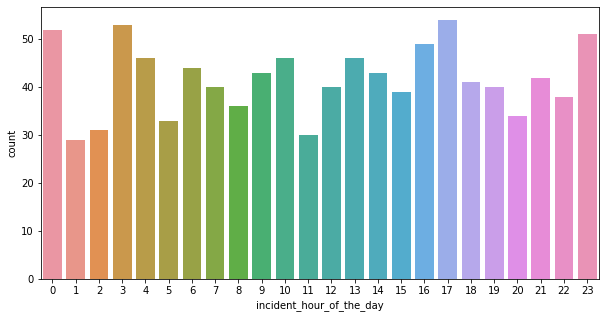

In [101]:
plt.figure(figsize=(10,5))
sns.countplot(x="incident_hour_of_the_day",data=icf)

Observation;

Data of incident_hour_of_the_day is not normally distributed.

<AxesSubplot: xlabel='fraud_reported', ylabel='incident_hour_of_the_day'>

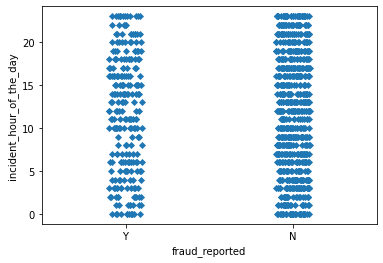

In [102]:
sns.stripplot(y="incident_hour_of_the_day",x="fraud_reported",data=icf,marker="D")

Observation;

fraud_reported No is higher for incident_hour_of_the_day.

In [103]:
icf["number_of_vehicles_involved"].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

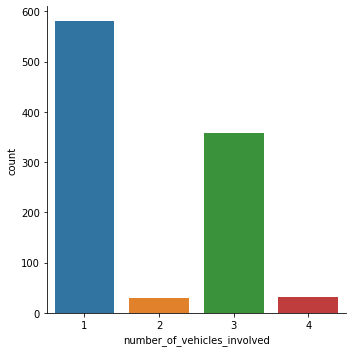

In [104]:
sns.catplot(x="number_of_vehicles_involved",data=icf,kind="count")

Observation;

number_of_vehicles_involved 1 is higher and 4 and 2 are lowest.

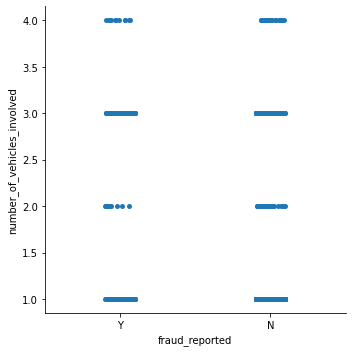

In [105]:
sns.catplot(y="number_of_vehicles_involved",x="fraud_reported",data=icf)

In number_of_vehicles_involved 4 yes fraud_reported is higher,it means who has more than 2 or 3 vihicles fraud_reported of those prople is high.

In [106]:
icf["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

<AxesSubplot: xlabel='property_damage', ylabel='count'>

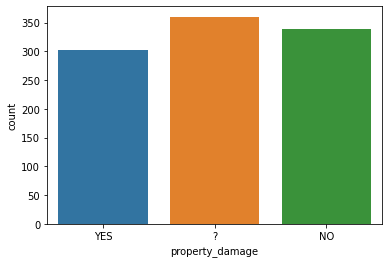

In [107]:
sns.countplot(x="property_damage",data=icf)

All data are same for property_damage.

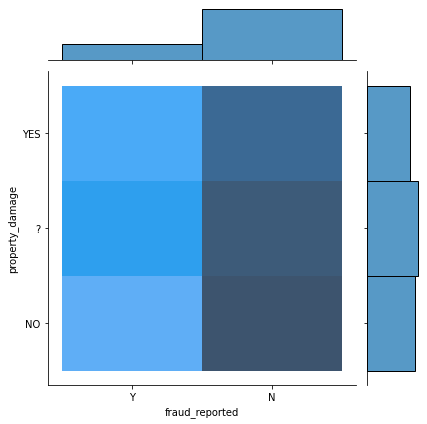

In [108]:
sns.jointplot(y="property_damage",x="fraud_reported",data=icf,kind="hist")

No fraud_reported is high for property_damage.

In [109]:
icf["bodily_injuries"].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

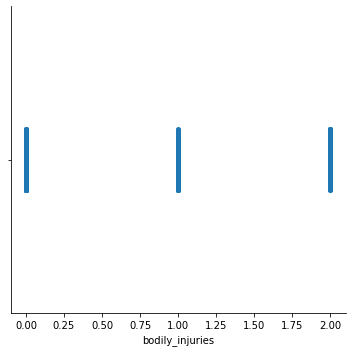

In [110]:
sns.catplot(x="bodily_injuries",data=icf)

All data same for bodily_injuries.

<AxesSubplot: xlabel='bodily_injuries', ylabel='fraud_reported'>

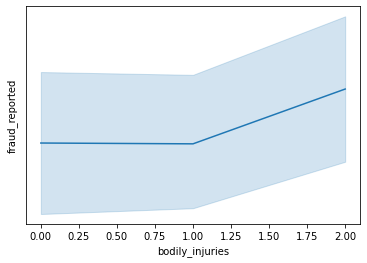

In [111]:
sns.lineplot(x="bodily_injuries",y="fraud_reported",data=icf)

fraud_reported is Yes is high in 2 type of bodily_injuries.

In [112]:
icf["witnesses"].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

<AxesSubplot: xlabel='witnesses'>

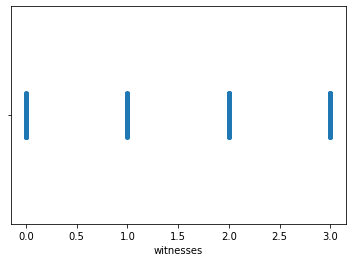

In [113]:
sns.stripplot(x="witnesses",data=icf)

All data same for witnesses column.

<AxesSubplot: xlabel='witnesses', ylabel='fraud_reported'>

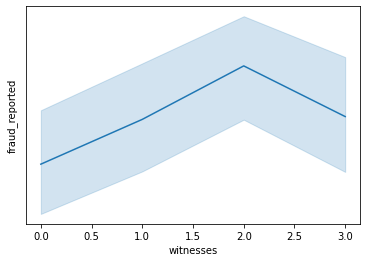

In [114]:
sns.lineplot(x="witnesses",y="fraud_reported",data=icf)

Observation;

fraud_reported yes is high in 2 type of witnesses.

In [115]:
icf["police_report_available"].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

<AxesSubplot: xlabel='police_report_available', ylabel='count'>

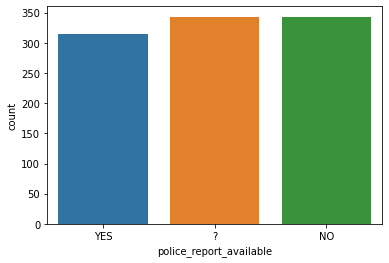

In [116]:
sns.countplot(x="police_report_available",data=icf)

All type of police_report_available are same.

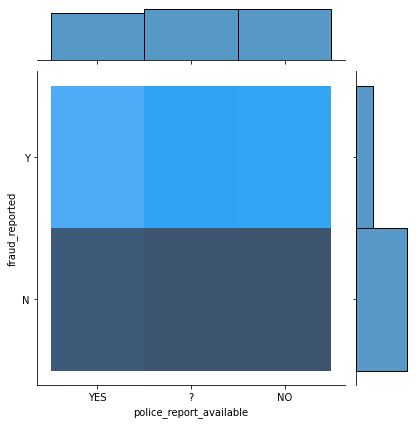

In [117]:
sns.jointplot(x="police_report_available",y="fraud_reported",data=icf,kind="hist")

fraud_reported No is higher for police_report_available.

In [118]:
icf["total_claim_amount"].value_counts()

59400    5
2640     4
70400    4
4320     4
44200    4
        ..
65250    1
87100    1
6240     1
66600    1
67500    1
Name: total_claim_amount, Length: 763, dtype: int64

<AxesSubplot: xlabel='total_claim_amount', ylabel='Count'>

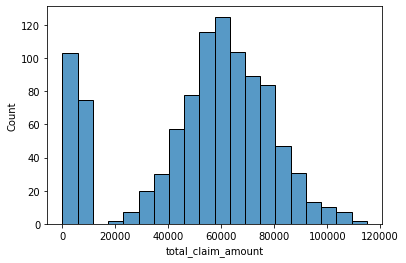

In [119]:
sns.histplot(icf["total_claim_amount"])

Data of total_claim_amount is normally distributed.

<AxesSubplot: xlabel='total_claim_amount', ylabel='fraud_reported'>

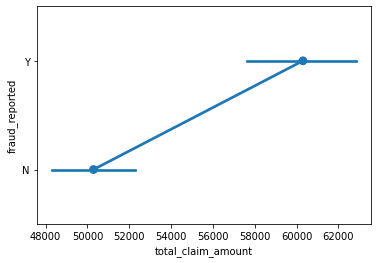

In [120]:
sns.pointplot(x="total_claim_amount",y="fraud_reported",data=icf)

fraud_reported yes is higher for total_claim_amount.

In [121]:
icf["injury_claim"].value_counts()

0        25
640       7
480       7
660       5
580       5
         ..
14840     1
6580      1
11820     1
16650     1
7500      1
Name: injury_claim, Length: 638, dtype: int64

<AxesSubplot: xlabel='injury_claim', ylabel='Count'>

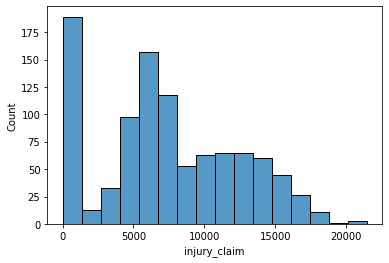

In [122]:
sns.histplot(icf["injury_claim"])

Data of injury_claim is not normally distributed.

<AxesSubplot: xlabel='injury_claim', ylabel='fraud_reported'>

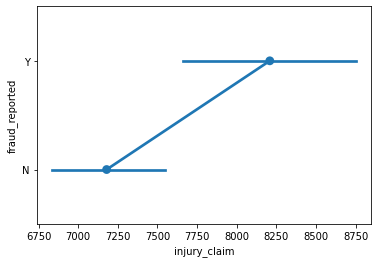

In [123]:
sns.pointplot(x="injury_claim",y="fraud_reported",data=icf)

fraud_reported Yes is higher for injury_claim.

In [124]:
icf["property_claim"].value_counts()

0        19
860       6
480       5
660       5
10000     5
         ..
3590      1
6480      1
4580      1
4920      1
7500      1
Name: property_claim, Length: 626, dtype: int64

<AxesSubplot: xlabel='property_claim', ylabel='Density'>

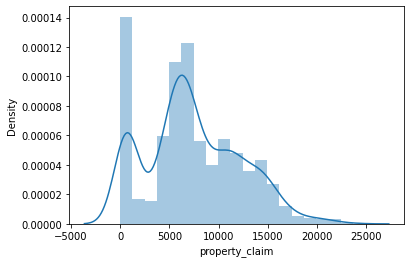

In [125]:
sns.distplot(icf["property_claim"])

property_claim data is not normally distributed.

<AxesSubplot: xlabel='property_claim', ylabel='fraud_reported'>

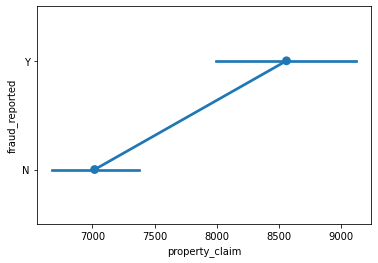

In [126]:
sns.pointplot(x="property_claim",y="fraud_reported",data=icf)

fraud_reported yes is high for property_claim.

In [127]:
icf["vehicle_claim"].value_counts()

5040     7
3360     6
52080    5
4720     5
3600     5
        ..
43360    1
25130    1
38940    1
47430    1
52500    1
Name: vehicle_claim, Length: 726, dtype: int64

<AxesSubplot: xlabel='vehicle_claim', ylabel='Density'>

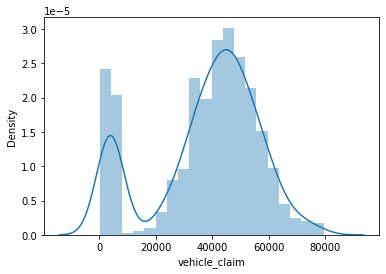

In [128]:
sns.distplot(icf["vehicle_claim"])

vehicle_claim data is normally distributed.

<AxesSubplot: xlabel='vehicle_claim', ylabel='fraud_reported'>

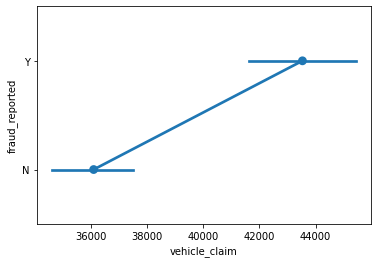

In [129]:
sns.pointplot(x="vehicle_claim",y="fraud_reported",data=icf)

fraud_reported Yes is high for vehicle_claim.

In [130]:
icf["auto_make"].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

<AxesSubplot: xlabel='auto_make', ylabel='count'>

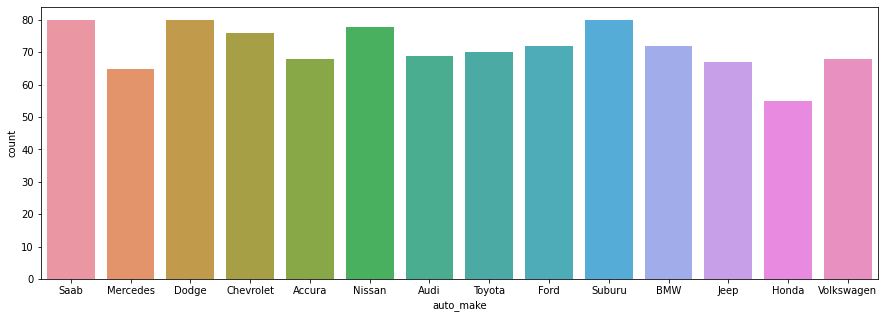

In [131]:
plt.figure(figsize=(15,5))
sns.countplot(x="auto_make",data=icf)

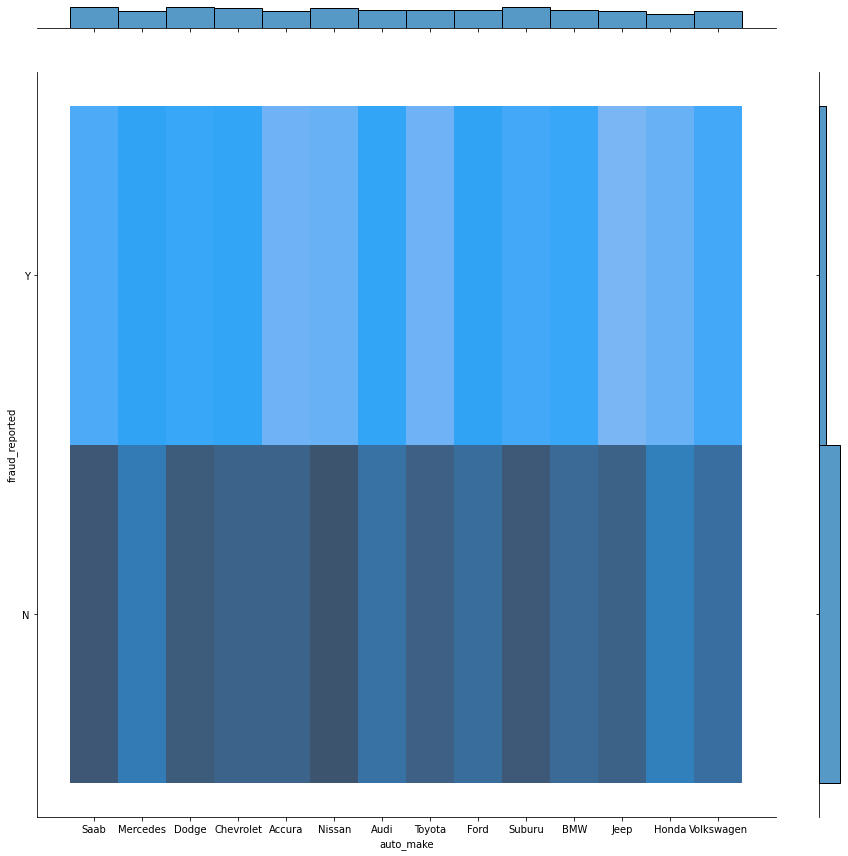

In [132]:
sns.jointplot(x="auto_make",y="fraud_reported",data=icf,height=12,space=2,ratio=12,kind="hist")

fraud_reported No is higher for auto_make.

In [133]:
icf["auto_model"].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

<AxesSubplot: xlabel='auto_model', ylabel='count'>

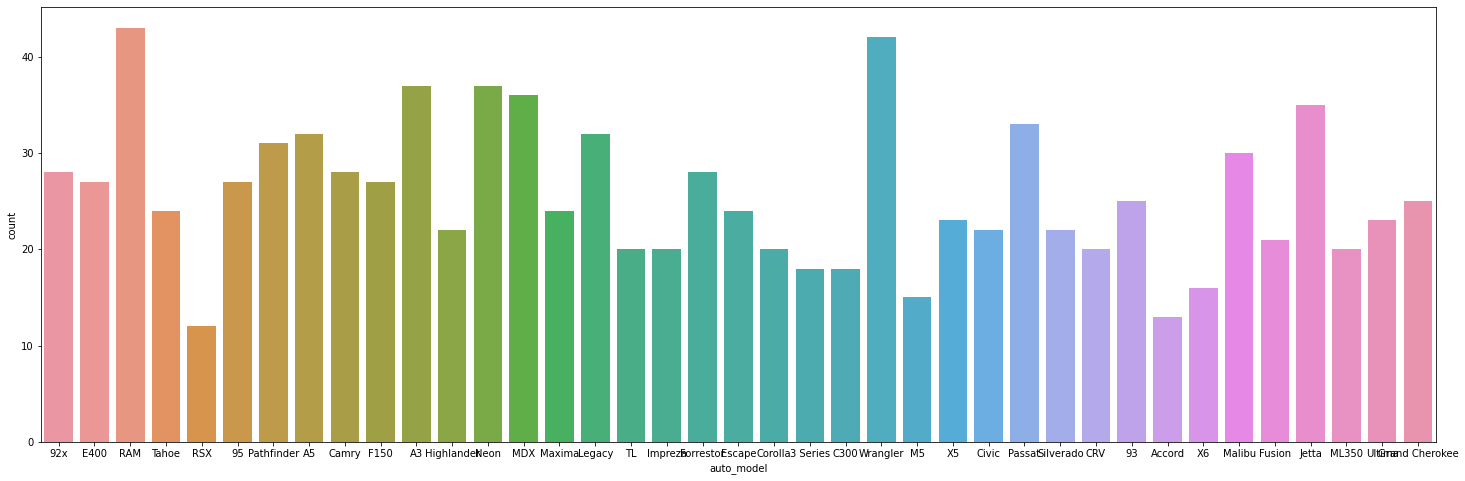

In [134]:
plt.figure(figsize=(25,8))
sns.countplot(x="auto_model",data=icf)

Data of auto_model is not normally distributed.

<AxesSubplot: xlabel='auto_model', ylabel='fraud_reported'>

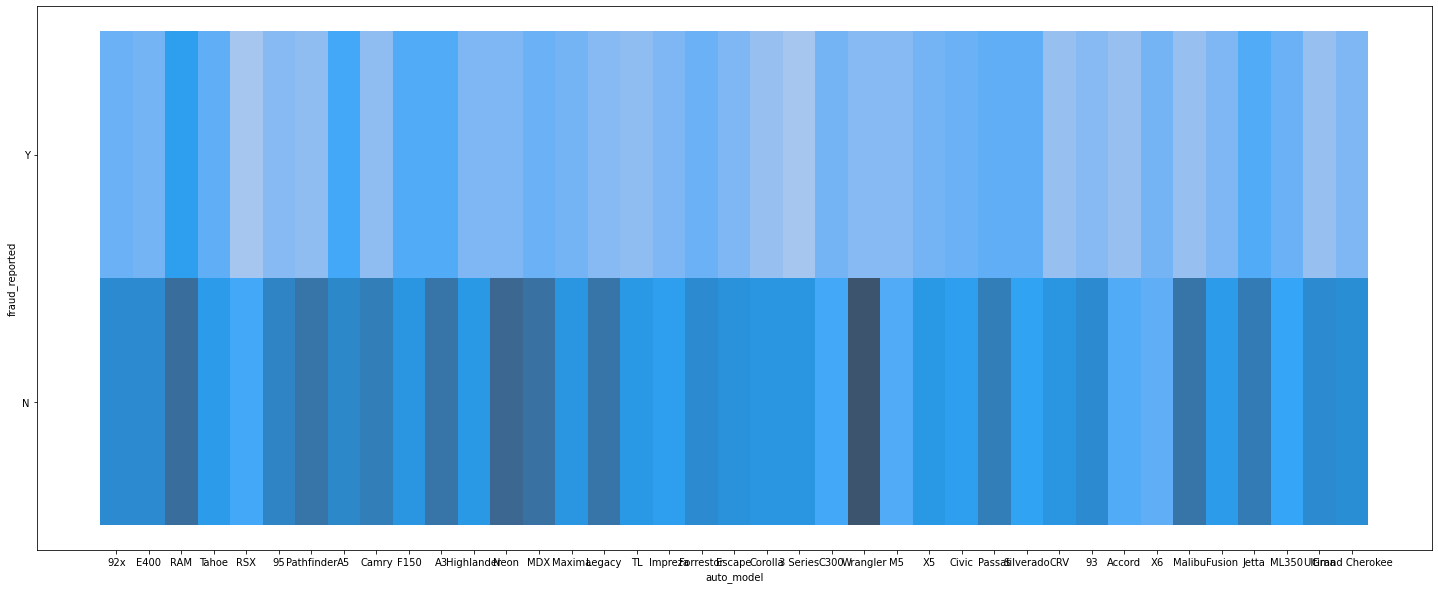

In [135]:
plt.figure(figsize=(25,10))
sns.histplot(x="auto_model",y="fraud_reported",data=icf)

fraud_reported NO is higher for auto_model.

In [136]:
icf["auto_year"].value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

<AxesSubplot: xlabel='auto_year', ylabel='count'>

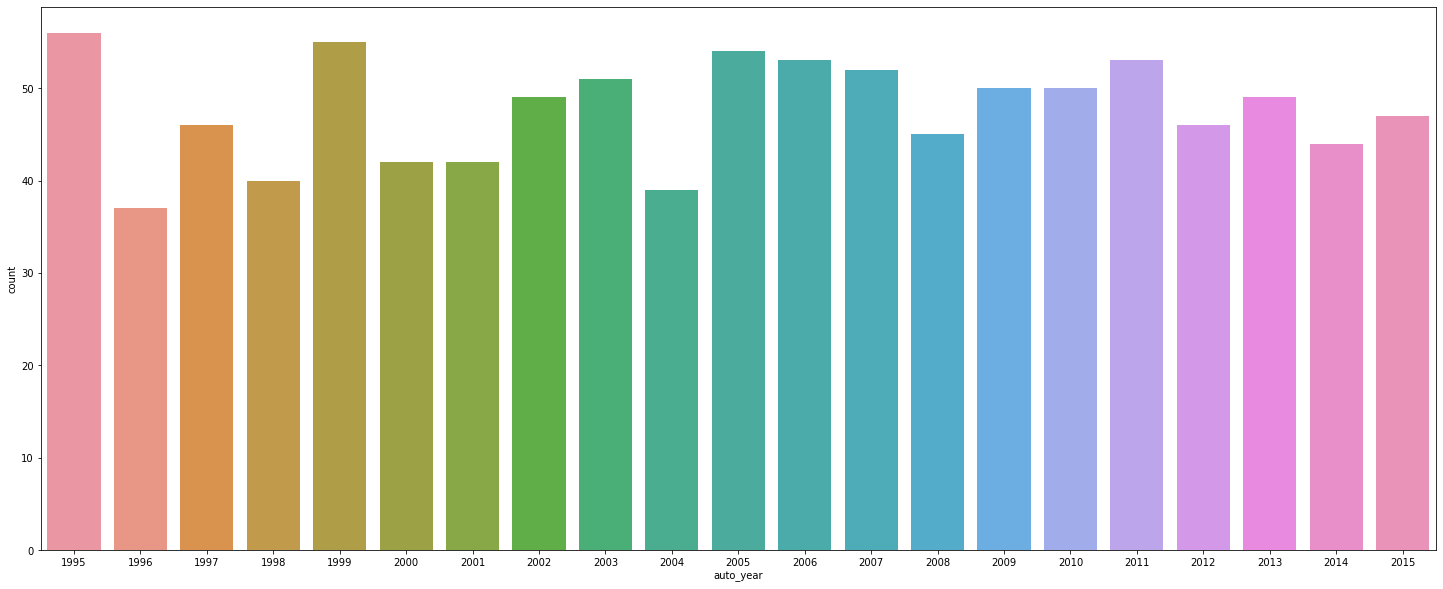

In [137]:
plt.figure(figsize=(25,10))
sns.countplot(x="auto_year",data=icf)

All auto_year data are almost same.

<AxesSubplot: xlabel='auto_year', ylabel='fraud_reported'>

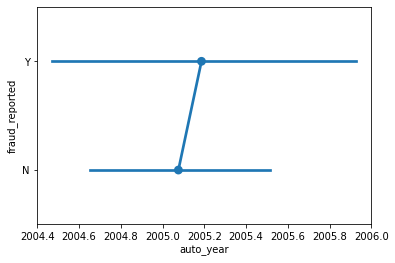

In [138]:
sns.pointplot(x="auto_year",y="fraud_reported",data=icf)

fraud_reported yes is high in 2005 auto_year.

In [139]:
icf["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot: xlabel='fraud_reported', ylabel='count'>

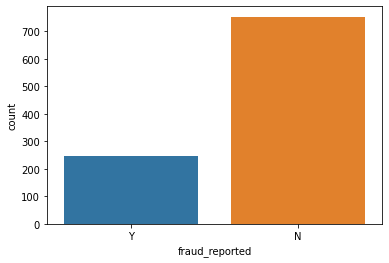

In [140]:
sns.countplot(x="fraud_reported",data=icf)

fraud_reported yes is higher than No.

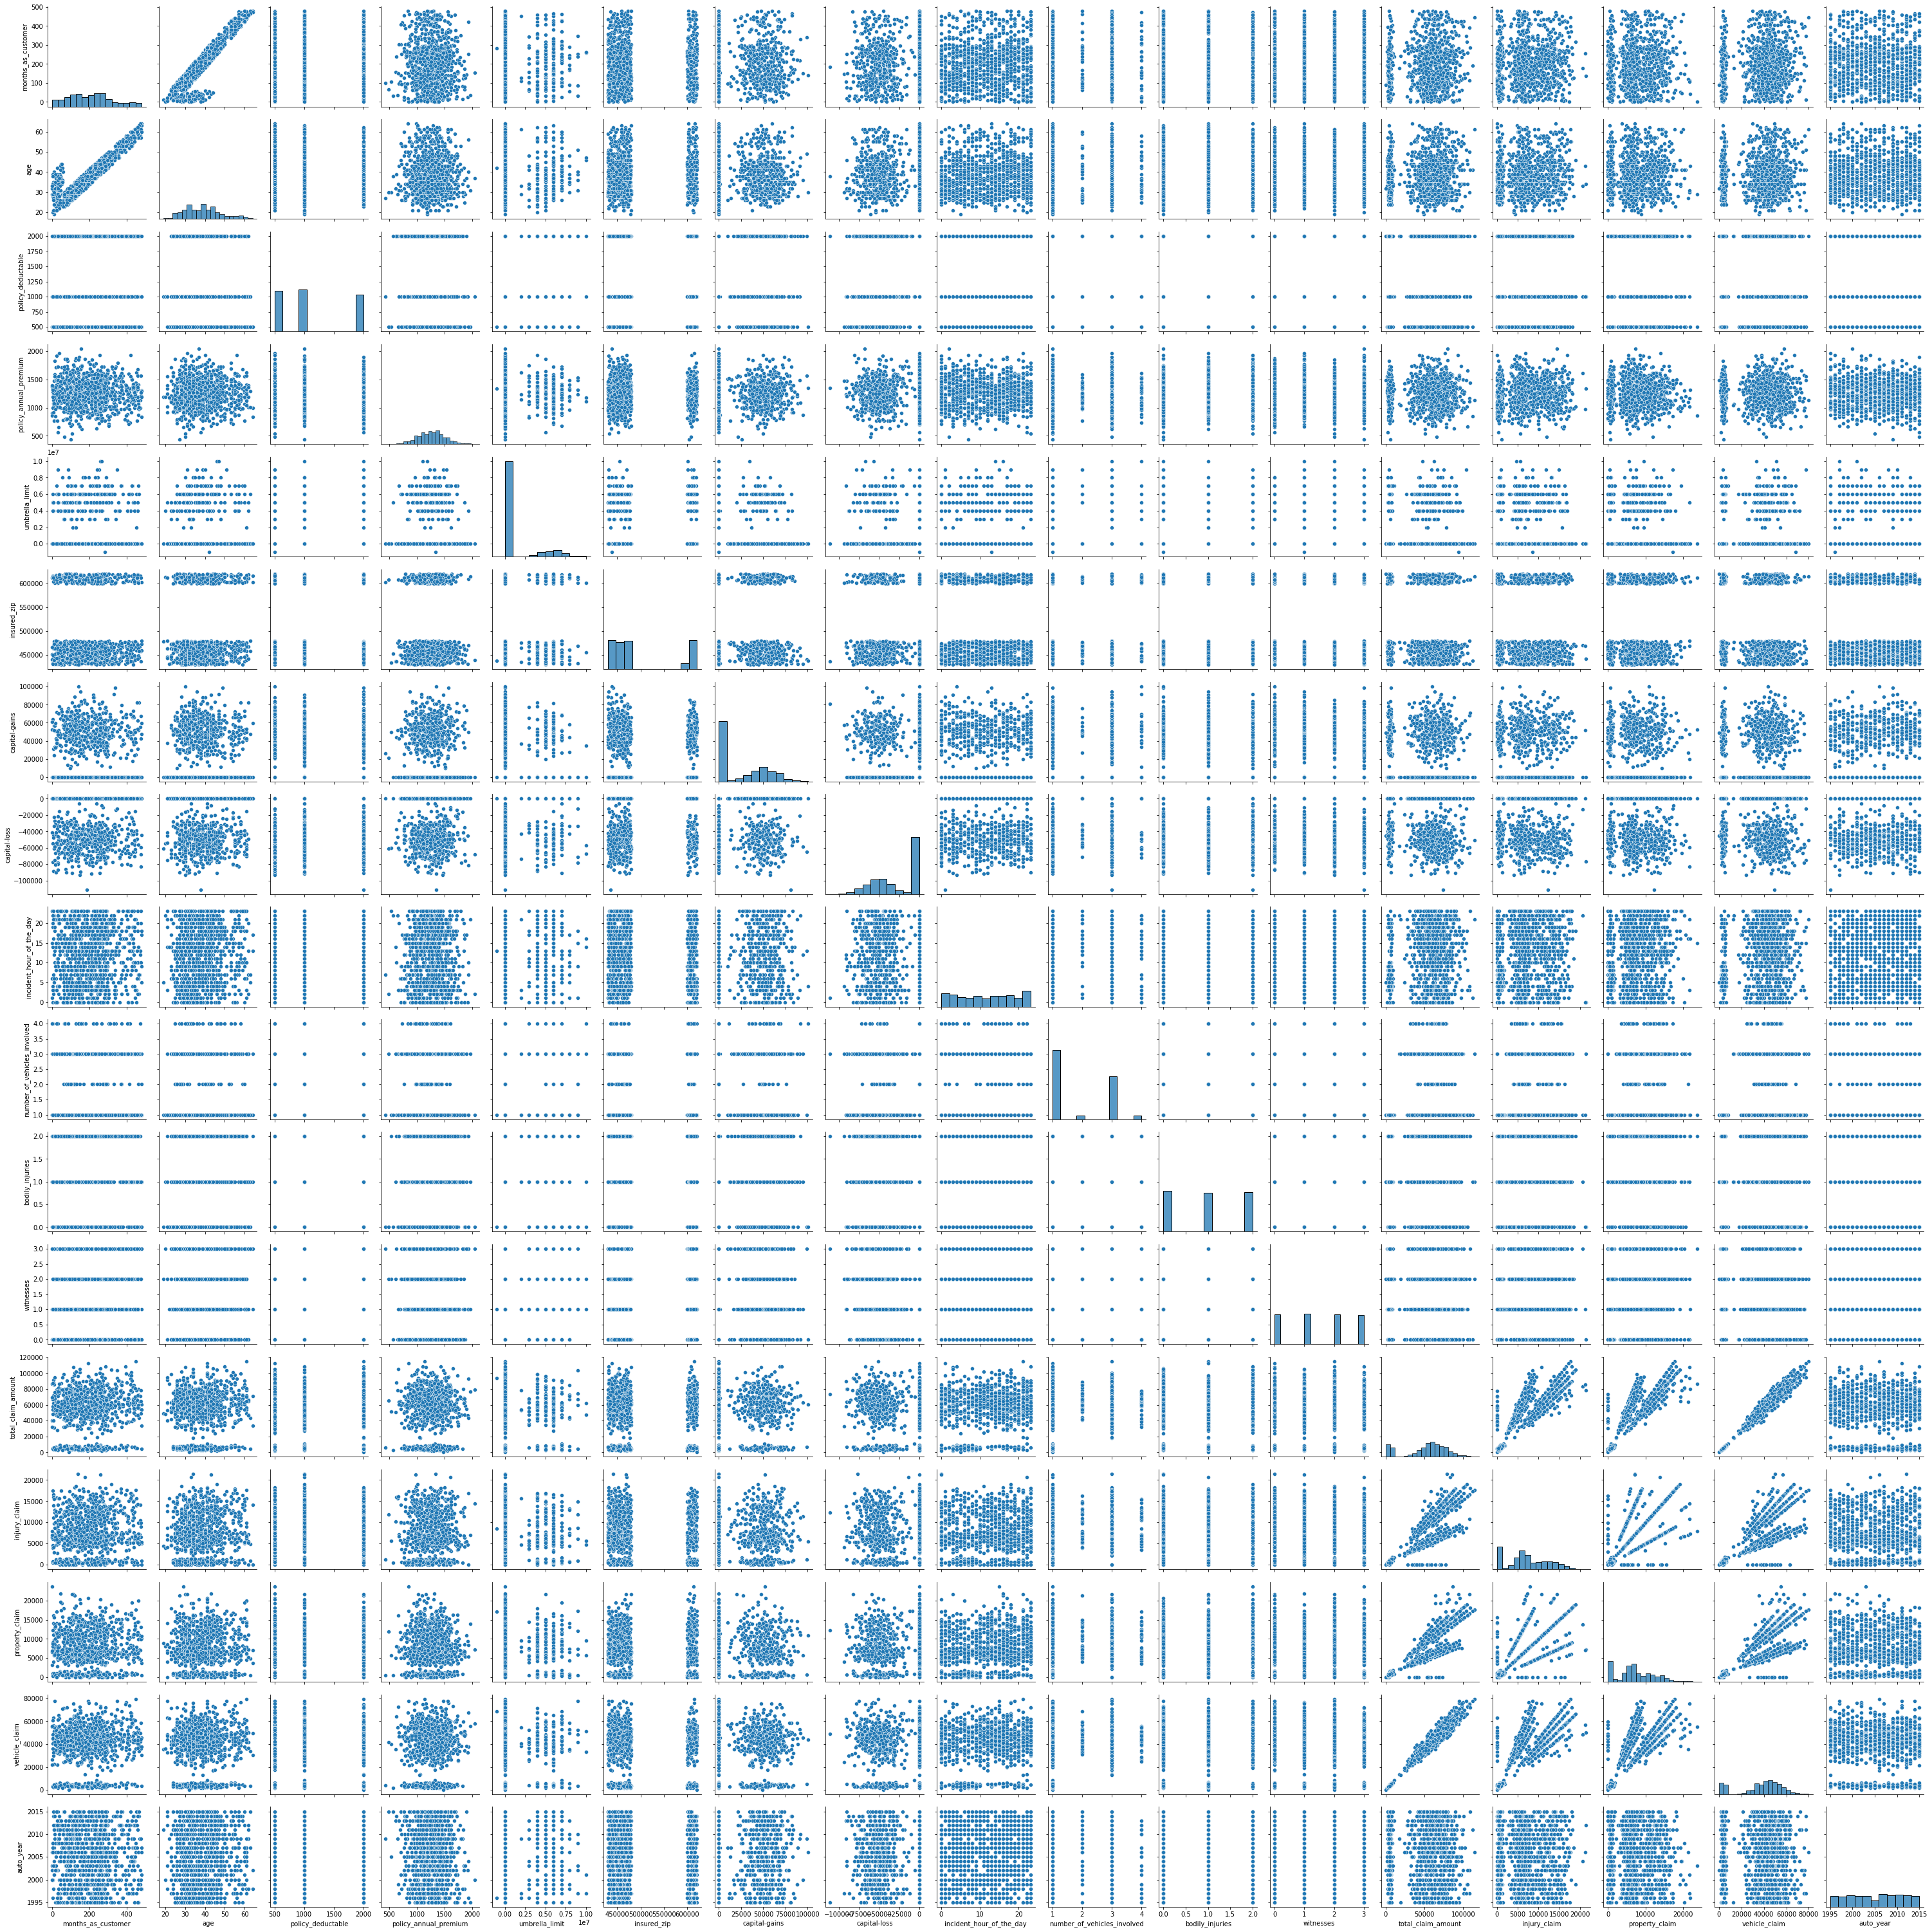

In [141]:
sns.pairplot(icf)

Observation:

Skewness is present in most of the columns.

# Lable Encoding

In [142]:
from sklearn.preprocessing import LabelEncoder

In [143]:
icf.head(2).T

0                  1
months_as_customer                                328                228
age                                                48                 42
policy_state                                       OH                 IN
policy_csl                                    250/500            250/500
policy_deductable                                1000               2000
policy_annual_premium                         1406.91            1197.22
umbrella_limit                                      0            5000000
insured_zip                                    466132             468176
insured_sex                                      MALE               MALE
insured_education_level                            MD                 MD
insured_occupation                       craft-repair  machine-op-inspct
insured_hobbies                              sleeping            reading
insured_relationship                          husband     other-relative
capital-gains                                   53300                  0
capital-loss                                        0                  0
incident_type                Single Vehicle Collision      Vehicle Theft
collision_type                         Side Collision                  ?
incident_severity                        Major Damage       Minor Damage
authorities_contacted                          Police             Police
incident_state                                     SC                 VA
incident_city                                Columbus          Riverwood
incident_hour_of_the_day                            5                  8
number_of_vehicles_involved                         1                  1
property_damage                                   YES                  ?
bodily_injuries                                     1                  0
witnesses                                           2                  0
police_report_available                           YES                  ?
total_claim_amount                              71610               5070
injury_claim                                     6510                780
property_claim                                  13020                780
vehicle_claim                                   52080               3510
auto_make                                        Saab           Mercedes
auto_model                                        92x               E400
auto_year                                        2004               2007
fraud_reported                                      Y                  Y

In [144]:
le=LabelEncoder()
objects=["policy_state","insured_sex","insured_education_level","insured_occupation","insured_hobbies","insured_relationship",
         "incident_type","collision_type","incident_severity","authorities_contacted","incident_state","incident_city","property_damage"
        ,"police_report_available","auto_make","fraud_reported","auto_model","policy_csl"]
for i in objects:
    icf[i]=le.fit_transform(icf[i].astype(str))
    
objects

['policy_state',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'fraud_reported',
 'auto_model',
 'policy_csl']

In [145]:
icf.head(2).T

0           1
months_as_customer              328.00      228.00
age                              48.00       42.00
policy_state                      2.00        1.00
policy_csl                        1.00        1.00
policy_deductable              1000.00     2000.00
policy_annual_premium          1406.91     1197.22
umbrella_limit                    0.00  5000000.00
insured_zip                  466132.00   468176.00
insured_sex                       1.00        1.00
insured_education_level           4.00        4.00
insured_occupation                2.00        6.00
insured_hobbies                  17.00       15.00
insured_relationship              0.00        2.00
capital-gains                 53300.00        0.00
capital-loss                      0.00        0.00
incident_type                     2.00        3.00
collision_type                    3.00        0.00
incident_severity                 0.00        1.00
authorities_contacted             4.00        4.00
incident_state                    4.00        5.00
incident_city                     1.00        5.00
incident_hour_of_the_day          5.00        8.00
number_of_vehicles_involved       1.00        1.00
property_damage                   2.00        0.00
bodily_injuries                   1.00        0.00
witnesses                         2.00        0.00
police_report_available           2.00        0.00
total_claim_amount            71610.00     5070.00
injury_claim                   6510.00      780.00
property_claim                13020.00      780.00
vehicle_claim                 52080.00     3510.00
auto_make                        10.00        8.00
auto_model                        1.00       12.00
auto_year                      2004.00     2007.00
fraud_reported                    1.00        1.00

In [146]:
x=icf.drop("fraud_reported",axis=1)
x.sample().T

471
months_as_customer               195.00
age                               38.00
policy_state                       0.00
policy_csl                         2.00
policy_deductable               2000.00
policy_annual_premium           1294.93
umbrella_limit               6000000.00
insured_zip                   477356.00
insured_sex                        1.00
insured_education_level            4.00
insured_occupation                12.00
insured_hobbies                   18.00
insured_relationship               4.00
capital-gains                  38000.00
capital-loss                  -50300.00
incident_type                      0.00
collision_type                     1.00
incident_severity                  1.00
authorities_contacted              0.00
incident_state                     6.00
incident_city                      6.00
incident_hour_of_the_day          12.00
number_of_vehicles_involved        3.00
property_damage                    2.00
bodily_injuries                    1.00
witnesses                          2.00
police_report_available            1.00
total_claim_amount             64620.00
injury_claim                    7180.00
property_claim                     0.00
vehicle_claim                  57440.00
auto_make                          4.00
auto_model                        27.00
auto_year                       2003.00

In [147]:
icf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int32  
 9   insured_education_level      1000 non-null   int32  
 10  insured_occupation           1000 non-null   int32  
 11  insured_hobbies              1000 non-null   int32  
 12  insured_relationship         1000 non-null   int32  
 13  capital-gains      

All object type independent variable has been encoded.

# Chacking The skewness

In [148]:
icf.skew().sort_values(ascending=False)

umbrella_limit                 1.806712
fraud_reported                 1.175051
insured_zip                    0.816554
number_of_vehicles_involved    0.502664
age                            0.478988
capital-gains                  0.478850
policy_deductable              0.477887
property_claim                 0.378169
months_as_customer             0.362177
incident_severity              0.279016
injury_claim                   0.264811
insured_sex                    0.148630
property_damage                0.106418
incident_type                  0.101507
policy_csl                     0.088928
insured_relationship           0.077488
police_report_available        0.052967
incident_city                  0.049531
witnesses                      0.019636
bodily_injuries                0.014777
policy_annual_premium          0.004402
insured_education_level       -0.000148
auto_make                     -0.018797
policy_state                  -0.026177
incident_hour_of_the_day      -0.035584


No high skewness is present in Incurance data.

# Checking Outliers

months_as_customer                AxesSubplot(0.125,0.749828;0.0945122x0.130172)
age                            AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
policy_state                   AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
policy_csl                     AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
policy_deductable              AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
policy_annual_premium          AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
umbrella_limit                 AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
insured_zip                       AxesSubplot(0.125,0.593621;0.0945122x0.130172)
insured_sex                    AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
insured_education_level        AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
insured_occupation             AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
insured_hobbies                AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
insured_relationship        

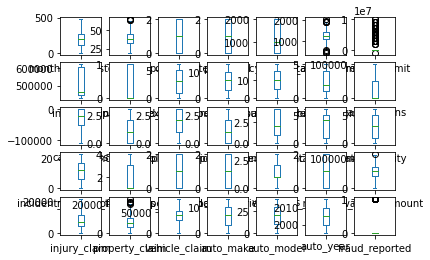

In [149]:
icf.plot(kind="box",subplots=True,layout=(5,7))

Outliers are present in Incurance claim fraud dataset.

# Removing Outliers

In [150]:
from scipy.stats import zscore

In [151]:
new_data=np.array(icf)

In [152]:
new_data

array([[3.280e+02, 4.800e+01, 2.000e+00, ..., 1.000e+00, 2.004e+03,
        1.000e+00],
       [2.280e+02, 4.200e+01, 1.000e+00, ..., 1.200e+01, 2.007e+03,
        1.000e+00],
       [1.340e+02, 2.900e+01, 2.000e+00, ..., 3.000e+01, 2.007e+03,
        0.000e+00],
       ...,
       [1.300e+02, 3.400e+01, 2.000e+00, ..., 1.900e+01, 1.996e+03,
        0.000e+00],
       [4.580e+02, 6.200e+01, 0.000e+00, ..., 5.000e+00, 1.998e+03,
        0.000e+00],
       [4.560e+02, 6.000e+01, 2.000e+00, ..., 1.200e+01, 2.007e+03,
        0.000e+00]])

In [153]:
z=np.abs(zscore(icf))
z

months_as_customer       age  policy_state  policy_csl  \
0              1.078140  0.990836      1.187173    0.060937   
1              0.208995  0.334073      0.016856    0.060937   
2              0.608002  1.088913      1.187173    1.182668   
3              0.452355  0.224613      1.220886    0.060937   
4              0.208995  0.552994      1.220886    1.304542   
..                  ...       ...           ...         ...   
995            1.746582  0.103769      1.187173    1.304542   
996            0.704407  0.224613      1.220886    1.182668   
997            0.642767  0.541611      1.187173    0.060937   
998            2.208028  2.523284      1.220886    1.304542   
999            2.190645  2.304363      1.187173    0.060937   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0             0.222383               0.616705        0.479476     0.489529   
1             1.412784               0.242521        1.697980     0.461008   
2             1.412784               0.642233        1.697980     0.984885   
3             1.412784               0.652886        2.133471     1.491682   
4             0.222383               1.341980        2.133471     1.527808   
..                 ...                    ...             ...          ...   
995           0.222383               0.222884        0.479476     0.975717   
996           0.222383               0.739141        0.479476     1.492519   
997           1.039966               0.520739        0.826998     0.815138   
998           1.412784               0.411866        1.697980     0.830250   
999           0.222383               2.008710        0.479476     1.549492   

     insured_sex  insured_education_level  ...  witnesses  \
0       1.076953                 0.530931  ...   0.461838   
1       1.076953                 0.530931  ...   1.338700   
2       0.928546                 1.557877  ...   1.362107   
3       0.928546                 1.557877  ...   0.461838   
4       1.076953                 1.522961  ...   0.438431   
..           ...                      ...  ...        ...   
995     0.928546                 1.044404  ...   0.438431   
996     0.928546                 1.557877  ...   1.362107   
997     0.928546                 1.044404  ...   1.362107   
998     1.076953                 1.522961  ...   0.438431   
999     0.928546                 1.522961  ...   1.362107   

     police_report_available  total_claim_amount  injury_claim  \
0                   1.270313            0.714257      0.189283   
1                   1.198712            1.807312      1.363822   
2                   0.035801            0.686362      0.054644   
3                   0.035801            0.403135      0.224130   
4                   0.035801            1.753121      1.257232   
..                       ...                 ...           ...   
995                 1.198712            1.305049      2.051155   
996                 1.198712            2.111466      2.182342   
997                 1.270313            0.558507      0.013648   
998                 1.270313            0.219110      0.453708   
999                 1.198712            1.807691      1.429416   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  \
0          1.165505       0.749653   0.856466    1.645743   0.183440   
1          1.372696       1.823346   0.360539    0.657470   0.315491   
2          0.736072       0.785565   0.631315    0.959702   0.315491   
3          0.219722       0.677607   0.879279    1.319074   1.479664   
4          1.399654       1.768252   1.623169    1.049545   0.648112   
..              ...            ...        ...         ...        ...   
995        0.273817       1.224309   0.135388    1.196528   0.149180   
996        2.214794       1.821868   1.600357    0.780016   1.645974   
997        0.020826       0.771902   1.104430    0.028570   1.513924   
998        0.451976       0.073580   1.375206    1.286371   1.181

In [154]:
thereshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 29,  6,  6,  6,  5, 14,
        6,  6,  6], dtype=int64))


In [155]:
new_data=icf[(z<3).all(axis=1)]
new_data

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     insured_education_level  ...  witnesses  police_report_available  \
0                          4  ...          2                        2   
1                          4  ...          0                        0   
2                          6  ...          3                        1   
3                          6  ...          2                        1   
4                          0  ...          1                        1   
..                       ...  ...        ...                      ...   
995                        5  ...          1                        0   
996                        6  ...          3                        0   
997                        5  ...          3                        2   
998                        0  ...          1                        2   
999                        0  ...          3                        0   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997               67500          7500            7500          52500   
998               46980          5220            5220          36540   
999                5060           460             920           3680   

     auto_make  auto_model  auto_year  fraud_reported  
0           10           1       2004               1  
1            8          12       2007               1  
2            4          30       2007               0  
3            3          34       2014               1  
4            0          31       2009               0  
..         ...         ...        ...             ...  
995          6           6       2006               0  
996         13          2

In [156]:
new_data.shape

(980, 35)

In [157]:
icf.shape

(1000, 35)

# 20 outliers has been removed.

In [158]:
icf=new_data
icf.sample()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
429                 467   58             1           2               2000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
429                  977.4               0       444500            1   

     insured_education_level  ...  witnesses  police_report_available  \
429                        5  ...          3                        1   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
429               55700          5570           11140          38990   

     auto_make  auto_model  auto_year  fraud_reported  
429          9          26       2014               0  

[1 rows x 35 columns]

In [159]:
x=icf.drop("fraud_reported",axis=1)

In [160]:
x.tail(2)

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     insured_education_level  ...  bodily_injuries  witnesses  \
998                        0  ...                0          1   
999                        0  ...                0          3   

     police_report_available  total_claim_amount  injury_claim  \
998                        2               46980          5220   
999                        0                5060           460   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  
998            5220          36540          1           5       1998  
999             920           3680          8          12       2007  

[2 rows x 34 columns]

In [161]:
x.sample().T

466
months_as_customer              126.00
age                              34.00
policy_state                      1.00
policy_csl                        0.00
policy_deductable              2000.00
policy_annual_premium          1078.22
umbrella_limit                    0.00
insured_zip                  453274.00
insured_sex                       0.00
insured_education_level           5.00
insured_occupation               13.00
insured_hobbies                   4.00
insured_relationship              5.00
capital-gains                 54500.00
capital-loss                      0.00
incident_type                     0.00
collision_type                    3.00
incident_severity                 0.00
authorities_contacted             1.00
incident_state                    4.00
incident_city                     3.00
incident_hour_of_the_day          2.00
number_of_vehicles_involved       3.00
property_damage                   1.00
bodily_injuries                   0.00
witnesses                         1.00
police_report_available           2.00
total_claim_amount            58410.00
injury_claim                  10620.00
property_claim                 5310.00
vehicle_claim                 42480.00
auto_make                         3.00
auto_model                       34.00
auto_year                      2007.00

# MULTICOLLINEARITY WITH VARIANCE INFLATION FACTOR

In [162]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [163]:
def vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [164]:
vif(x)

variables  VIF FACTOR
0            months_as_customer   28.585969
1                           age  131.582925
2                  policy_state    2.583380
3                    policy_csl    2.441017
4             policy_deductable    4.643480
5         policy_annual_premium   29.125174
6                umbrella_limit    1.261846
7                   insured_zip   51.877129
8                   insured_sex    1.917395
9       insured_education_level    3.412969
10           insured_occupation    3.807261
11              insured_hobbies    4.113933
12         insured_relationship    3.206331
13                capital-gains    1.882704
14                 capital-loss    1.982541
15                incident_type   11.244741
16               collision_type    5.904685
17            incident_severity    3.121688
18        authorities_contacted    3.191534
19               incident_state    3.412308
20                incident_city    3.205815
21     incident_hour_of_the_day    4.211481
22  number_of_vehicles_involved   21.934010
23              property_damage    2.436501
24              bodily_injuries    2.549115
25                    witnesses    2.879663
26      police_report_available    2.519483
27           total_claim_amount         inf
28                 injury_claim         inf
29               property_claim         inf
30                vehicle_claim         inf
31                    auto_make    3.919349
32                   auto_model    4.265270
33                    auto_year  205.189666

No high multicollinearty in Dataset.

# Scaling The data

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.06956809,  0.98335151,  1.17982066, ...,  0.85195935,
        -1.64044692, -0.18859446],
       [ 0.20272605,  0.32971067, -0.0245796 , ...,  0.35527871,
        -0.65173967,  0.31047639],
       [-0.61210547, -1.08651116,  1.17982066, ..., -0.63808258,
         0.96614491,  0.31047639],
       ...,
       [-0.64677915, -0.54181045,  1.17982066, ...,  1.10029967,
        -0.02256234, -1.51945005],
       [ 2.19646275,  2.50851348, -1.22897986, ..., -1.38310355,
        -1.28091701, -1.18673615],
       [ 2.17912591,  2.2906332 ,  1.17982066, ...,  0.35527871,
        -0.65173967,  0.31047639]])

# Prediction

In [167]:
from sklearn.model_selection import train_test_split

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [168]:
icf.head(2)

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48             2           1               1000   
1                 228   42             1           1               2000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132            1   
1                1197.22         5000000       468176            1   

   insured_education_level  ...  witnesses  police_report_available  \
0                        4  ...          2                        2   
1                        4  ...          0                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   

   auto_model  auto_year  fraud_reported  
0           1       2004               1  
1          12       2007               1  

[2 rows x 35 columns]

In [169]:
x=icf.drop("fraud_reported",axis=1)

In [170]:
x.sample()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
632                 287   45             2           2               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
632                1230.69               0       440720            1   

     insured_education_level  ...  bodily_injuries  witnesses  \
632                        5  ...                0          2   

     police_report_available  total_claim_amount  injury_claim  \
632                        1               53800          5380   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  
632            5380          43040          0          23       2006  

[1 rows x 34 columns]

In [171]:
y=icf["fraud_reported"]

In [172]:
y.sample()

867    0
Name: fraud_reported, dtype: int32

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.18,random_state=30)

In [174]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 34)
(177, 34)
(803,)
(177,)


In [175]:
gp=GaussianProcessClassifier()
gp.fit(x_train,y_train)
gppred=gp.predict(x_test)
print(accuracy_score(y_test,gppred)*100)
print(classification_report(y_test,gppred))
print(confusion_matrix(y_test,gppred))

79.66101694915254
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       141
           1       0.00      0.00      0.00        36

    accuracy                           0.80       177
   macro avg       0.40      0.50      0.44       177
weighted avg       0.63      0.80      0.71       177

[[141   0]
 [ 36   0]]


In [176]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfcpred=rfc.predict(x_test)
print(accuracy_score(y_test,rfcpred)*100)
print(classification_report(y_test,rfcpred))
print(confusion_matrix(y_test,rfcpred))

82.48587570621469
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       141
           1       0.63      0.33      0.44        36

    accuracy                           0.82       177
   macro avg       0.74      0.64      0.67       177
weighted avg       0.80      0.82      0.80       177

[[134   7]
 [ 24  12]]


In [177]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
print(accuracy_score(y_test,dtcpred)*100)
print(classification_report(y_test,dtcpred))
print(confusion_matrix(y_test,dtcpred))

79.66101694915254
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       141
           1       0.50      0.53      0.51        36

    accuracy                           0.80       177
   macro avg       0.69      0.70      0.69       177
weighted avg       0.80      0.80      0.80       177

[[122  19]
 [ 17  19]]


In [178]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
kncpred=knc.predict(x_test)
print(accuracy_score(y_test,kncpred)*100)
print(classification_report(y_test,kncpred))
print(confusion_matrix(y_test,kncpred))

75.14124293785311
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       141
           1       0.17      0.06      0.08        36

    accuracy                           0.75       177
   macro avg       0.48      0.49      0.47       177
weighted avg       0.67      0.75      0.70       177

[[131  10]
 [ 34   2]]


In [179]:
svc=SVC()
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
print(accuracy_score(y_test,svcpred)*100)
print(classification_report(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))

79.66101694915254
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       141
           1       0.00      0.00      0.00        36

    accuracy                           0.80       177
   macro avg       0.40      0.50      0.44       177
weighted avg       0.63      0.80      0.71       177

[[141   0]
 [ 36   0]]


RandomForestClassifier is best algorithm for Incurance claim dataset.

# AUC-ROC CURVE

In [180]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [181]:
y_pred_prob=gp.predict_proba(x_test)[:,1]
y_pred_prob

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [182]:
fbr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [183]:
print(fbr)
print(tpr)
print(thresholds)

[0. 1.]
[0. 1.]
[1.5 0.5]


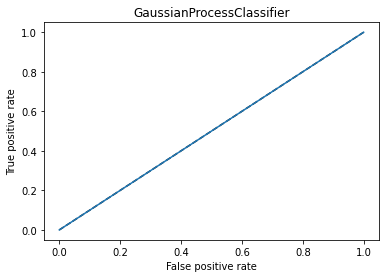

In [184]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fbr,tpr,label='GaussianProcessClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GaussianProcessClassifier')
plt.show()

In [185]:
auc_score=roc_auc_score(y_test,gp.predict(x_test))
auc_score

0.5

In [186]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]
y_pred_prob

array([0.21, 0.1 , 0.23, 0.21, 0.25, 0.61, 0.47, 0.16, 0.12, 0.51, 0.23,
       0.5 , 0.23, 0.22, 0.16, 0.43, 0.11, 0.43, 0.16, 0.11, 0.05, 0.11,
       0.14, 0.14, 0.15, 0.07, 0.44, 0.17, 0.07, 0.15, 0.14, 0.39, 0.48,
       0.22, 0.52, 0.44, 0.25, 0.17, 0.15, 0.42, 0.06, 0.4 , 0.1 , 0.12,
       0.41, 0.36, 0.23, 0.15, 0.1 , 0.17, 0.18, 0.08, 0.05, 0.29, 0.42,
       0.09, 0.45, 0.16, 0.15, 0.58, 0.31, 0.23, 0.15, 0.21, 0.2 , 0.24,
       0.09, 0.28, 0.12, 0.55, 0.14, 0.45, 0.43, 0.05, 0.24, 0.31, 0.26,
       0.22, 0.4 , 0.11, 0.58, 0.14, 0.08, 0.12, 0.53, 0.21, 0.48, 0.19,
       0.54, 0.53, 0.29, 0.07, 0.12, 0.19, 0.26, 0.17, 0.17, 0.15, 0.28,
       0.24, 0.54, 0.15, 0.57, 0.14, 0.31, 0.21, 0.29, 0.29, 0.25, 0.56,
       0.51, 0.16, 0.25, 0.13, 0.16, 0.07, 0.25, 0.08, 0.54, 0.28, 0.12,
       0.34, 0.15, 0.33, 0.19, 0.58, 0.1 , 0.11, 0.11, 0.13, 0.06, 0.1 ,
       0.12, 0.27, 0.12, 0.54, 0.5 , 0.46, 0.22, 0.27, 0.25, 0.21, 0.47,
       0.15, 0.13, 0.17, 0.02, 0.12, 0.19, 0.57, 0.

In [187]:
fbr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [188]:
print(fbr)
print(tpr)
print(thresholds)

[0.         0.         0.0070922  0.0212766  0.02836879 0.02836879
 0.04255319 0.04255319 0.04964539 0.04964539 0.06382979 0.07092199
 0.08510638 0.08510638 0.09219858 0.10638298 0.10638298 0.12056738
 0.12056738 0.12765957 0.12765957 0.12765957 0.12765957 0.13475177
 0.14893617 0.16312057 0.17730496 0.21985816 0.25531915 0.28368794
 0.31914894 0.34751773 0.39716312 0.40425532 0.43262411 0.43971631
 0.4964539  0.56028369 0.63120567 0.67375887 0.70921986 0.78723404
 0.84397163 0.87943262 0.92198582 0.95035461 0.96453901 0.9858156
 1.        ]
[0.         0.02777778 0.08333333 0.11111111 0.13888889 0.16666667
 0.22222222 0.27777778 0.27777778 0.33333333 0.33333333 0.36111111
 0.36111111 0.38888889 0.41666667 0.44444444 0.52777778 0.52777778
 0.55555556 0.58333333 0.61111111 0.66666667 0.72222222 0.72222222
 0.75       0.80555556 0.83333333 0.83333333 0.88888889 0.91666667
 0.91666667 0.94444444 0.97222222 0.97222222 0.97222222 0.97222222
 0.97222222 0.97222222 0.97222222 0.97222222 0.972

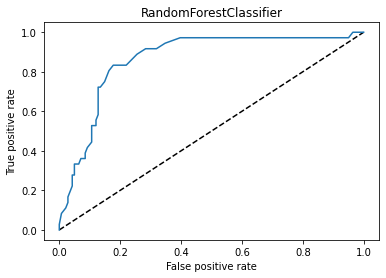

In [189]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fbr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [190]:
auc_score=roc_auc_score(y_test,rfc.predict(x_test))

In [191]:
auc_score

0.6418439716312057

In [193]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
y_pred_prob

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0.])

In [194]:
fbr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [195]:
print(fbr)
print(tpr)
print(thresholds)

[0.         0.13475177 1.        ]
[0.         0.52777778 1.        ]
[2. 1. 0.]


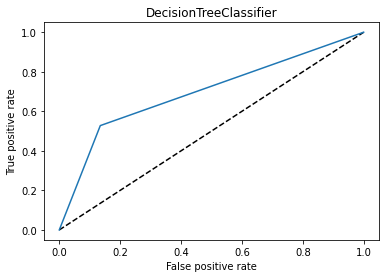

In [196]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fbr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

In [197]:
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

0.6965130023640662

In [199]:
y_pred_prob=knc.predict_proba(x_test)[:,1]
y_pred_prob

array([0. , 0. , 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0. , 0.8, 0.6, 0.2, 0.4,
       0.2, 0.6, 0.2, 0.2, 0.2, 0.4, 0.2, 0. , 0.2, 0.6, 0.4, 0.2, 0. ,
       0.2, 0.4, 0. , 0.4, 0.4, 0.4, 0.4, 0.4, 0. , 0.4, 0. , 0. , 0.6,
       0.2, 0. , 0. , 0.2, 0. , 0.2, 0.2, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2,
       0.2, 0.6, 0. , 0. , 0. , 0.2, 0.6, 0.4, 0.2, 0. , 0. , 0. , 0.4,
       0.4, 0.2, 0.2, 0. , 0.2, 0.2, 0.2, 0.2, 0. , 0.4, 0.2, 0. , 0.2,
       0.2, 0.4, 0.4, 0. , 0.2, 0. , 0.2, 0. , 0.2, 0. , 0.6, 0.2, 0.2,
       0.2, 0.4, 0.6, 0.2, 0.4, 0.2, 0.4, 0.2, 0.4, 0. , 0.2, 0.2, 0.6,
       0.2, 0.2, 0. , 0.2, 0.4, 0.2, 0.6, 0. , 0.4, 0.4, 0. , 0. , 0.4,
       0.4, 0.4, 0.2, 0.2, 0.4, 0.4, 0. , 0.2, 0.4, 0. , 0. , 0.6, 0.2,
       0. , 0. , 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.4, 0. , 0.2, 0.4, 0. ,
       0. , 0.2, 0.2, 0. , 0.2, 0. , 0.4, 0.2, 0.2, 0.2, 0.4, 0. , 0.2,
       0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.2, 0.2, 0. , 0.2, 0.2, 0. , 0.4,
       0.4, 0.4, 0. , 0.2, 0.2, 0.2, 0. , 0.2])

In [200]:
fbr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [201]:
print(fbr)
print(tpr)
print(thresholds)

[0.         0.         0.07092199 0.31914894 0.72340426 1.        ]
[0.         0.02777778 0.05555556 0.41666667 0.83333333 1.        ]
[1.8 0.8 0.6 0.4 0.2 0. ]


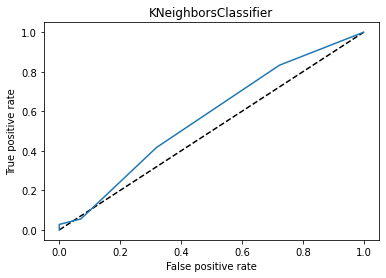

In [202]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fbr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

In [203]:
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

0.6965130023640662

# CROSS VAL SCORE

In [205]:
from sklearn.model_selection import cross_val_score

In [206]:
score=cross_val_score(gp,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75510204 0.75510204 0.75510204 0.75510204 0.75510204]
0.7551020408163265
0.0


In [207]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.78571429 0.74489796 0.74489796 0.7244898  0.78061224]
0.7561224489795919
0.023358210494407325


In [208]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79591837 0.75510204 0.75510204 0.78571429 0.80612245]
0.7795918367346938
0.02101149008364696


In [209]:
score=cross_val_score(knc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.74489796 0.70408163 0.67857143 0.70918367 0.70918367]
0.7091836734693878
0.021159634034007883


In [210]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75510204 0.75510204 0.75510204 0.75510204 0.75510204]
0.7551020408163265
0.0


# Hyper Parameter Tuning

In [211]:
from sklearn.model_selection import GridSearchCV

In [213]:
p1={"n_restarts_optimizer":[0,1,2,3],"max_iter_predict":[100,200,300],"warm_start":[True,False],"copy_X_train":[True,False]}

In [214]:
gd=GridSearchCV(estimator=gp,param_grid=p1,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print(gd.best_score_)

{'copy_X_train': True, 'max_iter_predict': 100, 'n_restarts_optimizer': 0, 'warm_start': True}
0.7551020408163265


In [215]:
gp=GaussianProcessClassifier(copy_X_train=True,max_iter_predict=100,n_restarts_optimizer=0,warm_start=True)
gp.fit(x_train,y_train)
gppred=gp.predict(x_test)
print(accuracy_score(y_test,gppred)*100)
print(classification_report(y_test,gppred))
print(confusion_matrix(y_test,gppred))

79.66101694915254
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       141
           1       0.00      0.00      0.00        36

    accuracy                           0.80       177
   macro avg       0.40      0.50      0.44       177
weighted avg       0.63      0.80      0.71       177

[[141   0]
 [ 36   0]]


In [216]:
p2={"n_estimators":[100,200,300],"criterion":["gini","entropy","log_loss"],"class_weight":["balanced","balanced_subsample",None],"max_samples":[None,1,2.1,2.0]}

In [217]:
gd=GridSearchCV(estimator=rfc,param_grid=p2,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print(gd.best_score_)

{'class_weight': None, 'criterion': 'gini', 'max_samples': None, 'n_estimators': 200}
0.7714285714285715


In [220]:
rfc=RandomForestClassifier(class_weight=None,criterion="gini",max_samples=None,n_estimators=200)
rfc.fit(x_train,y_train)
rfcpred=rfc.predict(x_test)
print(accuracy_score(y_test,rfcpred)*100)
print(classification_report(y_test,rfcpred))
print(confusion_matrix(y_test,rfcpred))

80.22598870056498
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       141
           1       0.52      0.33      0.41        36

    accuracy                           0.80       177
   macro avg       0.68      0.63      0.64       177
weighted avg       0.78      0.80      0.78       177

[[130  11]
 [ 24  12]]


In [222]:
p3={"criterion":["gini","entropy","log_loss"],"splitter":["best","random"],"min_impurity_decrease":[0.0,0.1,0.3],"max_leaf_nodes":[None,1,2,3]}

In [223]:
gd=GridSearchCV(estimator=dtc,param_grid=p3,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print(gd.best_score_)

{'criterion': 'gini', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.0, 'splitter': 'best'}
0.8091836734693876


In [224]:
dtc=DecisionTreeClassifier(criterion="gini",max_leaf_nodes=2,min_impurity_decrease=0.0,splitter="best")
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
print(accuracy_score(y_test,dtcpred)*100)
print(classification_report(y_test,dtcpred))
print(confusion_matrix(y_test,dtcpred))

81.92090395480226
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       141
           1       0.55      0.58      0.57        36

    accuracy                           0.82       177
   macro avg       0.72      0.73      0.73       177
weighted avg       0.82      0.82      0.82       177

[[124  17]
 [ 15  21]]


In [227]:
p4={"n_jobs":[None,1,2,3],"p":[2,4,6],"leaf_size":[30,40,50],"algorithm":["auto","ball_tree","kd_tree","brute"],"weights":["uniform","distance"]}

In [228]:
gd=GridSearchCV(estimator=knc,param_grid=p4,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print(gd.best_score_)

{'algorithm': 'auto', 'leaf_size': 30, 'n_jobs': None, 'p': 6, 'weights': 'uniform'}
0.7163265306122449


In [229]:
knc=KNeighborsClassifier(n_jobs=None,algorithm="auto",leaf_size=30,weights="uniform",p=6)
knc.fit(x_train,y_train)
kncpred=knc.predict(x_test)
print(accuracy_score(y_test,kncpred)*100)
print(classification_report(y_test,kncpred))
print(confusion_matrix(y_test,kncpred))

75.70621468926554
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       141
           1       0.29      0.14      0.19        36

    accuracy                           0.76       177
   macro avg       0.55      0.53      0.52       177
weighted avg       0.70      0.76      0.72       177

[[129  12]
 [ 31   5]]


In [ ]:
SVC

In [230]:
p5={"break_ties":[True,False],"decision_function_shape":["ovo","ovr"],"max_iter":[1,2,3,4],"verbose":[False,True]}

In [231]:
gd=GridSearchCV(estimator=svc,param_grid=p5,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print(gd.best_score_)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]{'break_ties': True, 'decision_function_shape': 'ovr', 'max_iter': 3, 'verbose': False}
0.5693877551020409


In [232]:
svc=SVC(break_ties=True,decision_function_shape="ovr",max_iter=3,verbose=False)
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
print(accuracy_score(y_test,svcpred)*100)
print(classification_report(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))

25.98870056497175
              precision    recall  f1-score   support

           0       0.66      0.15      0.24       141
           1       0.17      0.69      0.28        36

    accuracy                           0.26       177
   macro avg       0.41      0.42      0.26       177
weighted avg       0.56      0.26      0.25       177

[[ 21 120]
 [ 11  25]]


By using hyper parametric tunning DecisionTreeClassifier is working well.

# Saving the best model

In [233]:
import pickle

file="incurance_claim_fraud_prediction"
pickle.dump(dtc,open(file,"wb"))

# Loading the file

In [234]:
load_model=pickle.load(open(file,"rb"))
load_model.predict(x_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0])